<h2><center>Credit Card Fraud Detection</center></h2> 
                                                                                                                                                                                                                                                                                                                             

 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Background:</b></label> 

<p style="text-align:justify"><b>Finex</b> is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.</p>


 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Context:</b></label> 
 
 Credit card fraud is any dishonest act or behaviour to obtain information without the proper authorisation of the account holder for financial gain. Among the different ways of committing fraud, skimming is the most common one. Skimming is a method used for duplicating information located on the magnetic stripe of the card.  Apart from this, other ways of making fraudulent transactions are as follows:

- Manipulation or alteration of genuine cards
- Creation of counterfeit cards
- Stolen or lost credit cards
- Fraudulent telemarketing
 

 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Problem Statement:</b></label> 
 
 - To develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants

 <label style="color:#1F83BF;font-size:18px;text-decoration: underline" ><b>Project Pipeline:</b></label> 

1. Import Libraries and Data Reading
2. Data Cleaning and New Feature Derivation
3. Exploratory data analysis
4. Data Preparation: Train/Test Data Splitting
5. Model Building and Evaluation
6. Business Impact

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **1. Import Libraries & Data Reading**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# For Decision Tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#For Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


##### **1.1 Read Train and Test Data from Kaggle**

In [2]:
# Read the train and test data

#Train_data:

credit_train=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/fraudTrain.csv")
credit_train.head()



Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
credit_test=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/fraudTest.csv")
credit_test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [5]:
# Determine the number of rows and columns in the data
print("The shape of the train dataset obtained from kaggle is",credit_train.shape)
print("The shape of the test dataset obtained from kaggle is",credit_test.shape)

The shape of the train dataset obtained from kaggle is (1296675, 23)
The shape of the test dataset obtained from kaggle is (555719, 23)


###### **1.12 Kaggle Datasets Concatenation**

In [4]:
credit_final=pd.concat([credit_train, credit_test], axis = 0)
credit_final.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [5]:
#The column 'Unnamed: 0' and the indices does not seem to add any value. Therefore it is good to drop them.

credit_final.drop(['Unnamed: 0'], axis=1,inplace=True)



In [6]:
#Drop the index column
credit_final.reset_index(drop=True, inplace=True)


In [7]:
# check if the operation is completed

credit_final.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city state    zip      lat  \
0                561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1  43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2      594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3   9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4              408 Bradley Rest        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [86]:
## Creating a copy of the final dataframe for operations in the future

credit_final_copy=credit_final.copy()
credit_final_copy.tail(3)

trans_date_trans_time            cc_num               merchant  \
1852391   2020-12-31 23:59:15  6011724471098086        fraud_Rau-Robel   
1852392   2020-12-31 23:59:24     4079773899158  fraud_Breitenberg LLC   
1852393   2020-12-31 23:59:34  4170689372027579      fraud_Dare-Marvin   

              category    amt   first     last gender  \
1852391      kids_pets  86.88     Ann   Lawson      F   
1852392         travel   7.99    Eric  Preston      M   
1852393  entertainment  38.13  Samuel     Frey      M   

                             street     city state    zip      lat      long  \
1852391  144 Evans Islands Apt. 683  Burbank    WA  99323  46.1966 -118.9017   
1852392  7020 Doyle Stream Apt. 951     Mesa    ID  83643  44.6255 -116.4493   
1852393    830 Myers Plaza Apt. 384   Edmond    OK  73034  35.6665  -97.4798   

         city_pop           job         dob                         trans_num  \
1852391      3684      Musician  1981-11-29  6c5b7c8add471975aa0fec023b2e8408   
1852392       129  Cartographer  1965-12-15  14392d723bb7737606b2700ac791b7aa   
1852393    116001   Media buyer  1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3   

          unix_time  merch_lat  merch_long  is_fraud  
1852391  1388534355  46.658340 -119.715054         0  
1852392  1388534364  44.470525 -117.080888         0  
1852393  1388534374  36.210097  -97.036372         0

In [11]:
print("The shape of the final dataset for analysis and model building is {}".format(credit_final.shape))

The shape of the final dataset for analysis and model building is (1852394, 22)


<b>Summary: </b>

1. The train and test data obtained from kaggle are concatenated with credit_train on top of credit_test for further operations.
2. The shape of the combined dataset is (1852394, 22)

### **2. Data Cleaning**

In [12]:
# Check the columns in the dataframe
credit_final.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
# Dropping columns which will not add value to the model
 
credit_final.drop(['first', 'last','dob','unix_time','job','state','gender','street'], axis=1,inplace=True)


In [9]:
# Split 'trans_date_trans_time' into trans_date and trans_time

credit_final['Transaction_date']=credit_final['trans_date_trans_time'].apply(lambda x:x.split()[0])
credit_final['Transaction_Time']=credit_final['trans_date_trans_time'].apply(lambda x:x.split()[1])


In [10]:
#Convert data type Transaction_Time and Transaction_Date to datetime format
credit_final["Transaction_Time"]= pd.to_datetime(credit_final["Transaction_Time"]).dt.time

In [11]:
credit_final["Transaction_date"]= pd.to_datetime(credit_final["Transaction_date"])

In [12]:
# The feature 'merchant' has '_fraud' in the beginning of every string. Lets get rid of it. 

credit_final['merchant']=credit_final['merchant'].apply(lambda x:x.split('_')[1])

In [18]:
# Let us check if the above code worked

credit_final.head(3)

trans_date_trans_time            cc_num                   merchant  \
0   2019-01-01 00:00:18  2703186189652095       Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322  Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661             Lind-Buckridge   

        category     amt            city    zip      lat      long  city_pop  \
0       misc_net    4.97  Moravian Falls  28654  36.0788  -81.1781      3495   
1    grocery_pos  107.23          Orient  99160  48.8878 -118.2105       149   
2  entertainment  220.11      Malad City  83252  42.1808 -112.2620      4154   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   

  Transaction_date Transaction_Time  
0       2019-01-01         00:00:18  
1       2019-01-01         00:00:44  
2       2019-01-01         00:00:51

In [13]:
#Drop the redundant feature since the date and time have been extracted from it.
credit_final.drop(['trans_date_trans_time'], axis=1,inplace=True)

In [14]:
# From transaction time, let's identify the hours at which the transaction happened in order to give them time ranges. 
#This derived feature will later be used to find the time range in which most fraudulent transactions happen.

credit_final['Transaction_Hour']=credit_final['Transaction_Time'].astype(str).str[:2]
credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

             city    zip      lat      long  city_pop  \
0  Moravian Falls  28654  36.0788  -81.1781      3495   
1          Orient  99160  48.8878 -118.2105       149   
2      Malad City  83252  42.1808 -112.2620      4154   
3         Boulder  59632  46.2306 -112.1138      1939   
4        Doe Hill  24433  38.4207  -79.4629        99   
5          Dublin  18917  40.3750  -75.2045      2158   
6         Holcomb  67851  37.9931 -100.9893      2691   
7        Edinburg  22824  38.8432  -78.6003      6018   
8           Manor  15665  40.3359  -79.6607      1472   
9     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Transaction_Time Transaction_Hour  
0       2019-01-01         00:00:18               00  
1       2019-01-01         00:00:44               00  
2       2019-01-01         00:00:51               00  
3       2019-01-01         00:01:16               00  
4       2019-01-01         00:03:06               00  
5       2019-01-01         00:04:08               00  
6       2019-01-01         00:04:42               00  
7       2019-01-01         00:05:08               00  
8       2019-01-01         00:05:18               00  
9       2019-01-01         00:06:01               00

In [15]:
#Create a name column called Time_range to bucket the transaction hours

conditions=[
            
            (credit_final['Transaction_Hour'].astype(float)>=22) | (credit_final['Transaction_Hour'].astype(float)<4),
            (credit_final['Transaction_Hour'].astype(int)>=4) & (credit_final['Transaction_Hour'].astype(int)< 10),
            (credit_final['Transaction_Hour'].astype(int)>=10) & (credit_final['Transaction_Hour'].astype(int)<16),
            (credit_final['Transaction_Hour'].astype(int)>=16) & (credit_final['Transaction_Hour'].astype(int)<22)
             
          ]

values=['10 pm - 4 am','4 am - 10 am','10 am - 4 pm','4 pm - 10 pm' ]

credit_final['Trans_time_range']=np.select(conditions,values)

credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

             city    zip      lat      long  city_pop  \
0  Moravian Falls  28654  36.0788  -81.1781      3495   
1          Orient  99160  48.8878 -118.2105       149   
2      Malad City  83252  42.1808 -112.2620      4154   
3         Boulder  59632  46.2306 -112.1138      1939   
4        Doe Hill  24433  38.4207  -79.4629        99   
5          Dublin  18917  40.3750  -75.2045      2158   
6         Holcomb  67851  37.9931 -100.9893      2691   
7        Edinburg  22824  38.8432  -78.6003      6018   
8           Manor  15665  40.3359  -79.6607      1472   
9     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Transaction_Time Transaction_Hour Trans_time_range  
0       2019-01-01         00:00:18               00     10 pm - 4 am  
1       2019-01-01         00:00:44               00     10 pm - 4 am  
2       2019-01-01         00:00:51               00     10 pm - 4 am  
3       2019-01-01         00:01:16               00     10 pm - 4 am  
4       2019-01-01         00:03:06               00     10 pm - 4 am  
5       2019-01-01         00:04:08               00     10 pm - 4 am  
6       2019-01-01         00:04:42               00     10 pm - 4 am  
7       2019-01-01         00:05:08               00     10 pm - 4 am  
8       2019-01-01         00:05:18               00     10 pm - 4 am  
9       2019-01-01         00:06:01               00     10 pm - 4 am

In [22]:
# Checking the time range in which most fraudulent transactions
credit_final['Trans_time_range'].where(credit_final.is_fraud==1).value_counts()

10 pm - 4 am    8169
4 pm - 10 pm     606
10 am - 4 pm     489
4 am - 10 am     387
Name: Trans_time_range, dtype: int64

In [16]:
#As the time range has been found, the redundant features, Transaction_Time and Transaction_Hours can be dropped.

credit_final.drop(['Transaction_Time','Transaction_Hour'],axis=1,inplace=True)


In [17]:
# Deriving a feature City_Size from City's population

conditions_city=[
            
            (credit_final['city_pop']<5000),
            (credit_final['city_pop']>=5000) & (credit_final['city_pop']< 200000),
            (credit_final['city_pop']>=200000) & (credit_final['city_pop']< 1000000),
            (credit_final['city_pop']>=1000000) & (credit_final['city_pop']<1500000),
            (credit_final['city_pop']>=1500000)   
          ]

values_city=['Very Small','Small','Medium','Large','Very Large' ]

credit_final['City_Size']=np.select(conditions_city,values_city)

credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

             city    zip      lat      long  city_pop  \
0  Moravian Falls  28654  36.0788  -81.1781      3495   
1          Orient  99160  48.8878 -118.2105       149   
2      Malad City  83252  42.1808 -112.2620      4154   
3         Boulder  59632  46.2306 -112.1138      1939   
4        Doe Hill  24433  38.4207  -79.4629        99   
5          Dublin  18917  40.3750  -75.2045      2158   
6         Holcomb  67851  37.9931 -100.9893      2691   
7        Edinburg  22824  38.8432  -78.6003      6018   
8           Manor  15665  40.3359  -79.6607      1472   
9     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Trans_time_range   City_Size  
0       2019-01-01     10 pm - 4 am  Very Small  
1       2019-01-01     10 pm - 4 am  Very Small  
2       2019-01-01     10 pm - 4 am  Very Small  
3       2019-01-01     10 pm - 4 am  Very Small  
4       2019-01-01     10 pm - 4 am  Very Small  
5       2019-01-01     10 pm - 4 am  Very Small  
6       2019-01-01     10 pm - 4 am  Very Small  
7       2019-01-01     10 pm - 4 am       Small  
8       2019-01-01     10 pm - 4 am  Very Small  
9       2019-01-01     10 pm - 4 am       Small

In [30]:
# Checking whether city_size relates to fraudulent transaction frequency

filter1=credit_final['city']=='Houston'
filter2=credit_final['is_fraud']==1

credit_final['City_Size'].where(filter1 & filter2).value_counts()

Very Large    39
Name: City_Size, dtype: int64

There does not seem to be much relation between city_size and frequency of fraudulent transactions. Therefore this derived feature may be dropped.

In [18]:
## Creating a column from credit_final['city'], city_risk, on the basis of number of frauds happened.

x=pd.DataFrame(credit_final.groupby(credit_final['city'])['is_fraud'].sum())
x.columns = ['Fraud_Count']
x.reset_index(inplace=True)
credit_final['City_Frauds'] = credit_final['city'].map(x.set_index('city')['Fraud_Count'])
credit_final.head()


cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   

             city    zip      lat      long  city_pop  \
0  Moravian Falls  28654  36.0788  -81.1781      3495   
1          Orient  99160  48.8878 -118.2105       149   
2      Malad City  83252  42.1808 -112.2620      4154   
3         Boulder  59632  46.2306 -112.1138      1939   
4        Doe Hill  24433  38.4207  -79.4629        99   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date Trans_time_range   City_Size  City_Frauds  
0       2019-01-01     10 pm - 4 am  Very Small           11  
1       2019-01-01     10 pm - 4 am  Very Small           11  
2       2019-01-01     10 pm - 4 am  Very Small            8  
3       2019-01-01     10 pm - 4 am  Very Small           15  
4       2019-01-01     10 pm - 4 am  Very Small           13

In [19]:
# Checking if the above code worked

conditions_city_fraud=[
            
            (credit_final['City_Frauds']<10),
            (credit_final['City_Frauds']>=10) & (credit_final['City_Frauds']< 20),
            (credit_final['city_pop']>=20)
          ]

values_city_fraud=['Low','Medium','High']

credit_final['City_Fraud_Risk']=np.select(conditions_city_fraud,values_city_fraud)
credit_final.head(3)
#credit_final.loc[credit_final['city'] == 'Boulder']

cc_num                   merchant       category     amt  \
0  2703186189652095       Rippin, Kub and Mann       misc_net    4.97   
1      630423337322  Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661             Lind-Buckridge  entertainment  220.11   

             city    zip      lat      long  city_pop  \
0  Moravian Falls  28654  36.0788  -81.1781      3495   
1          Orient  99160  48.8878 -118.2105       149   
2      Malad City  83252  42.1808 -112.2620      4154   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   

  Transaction_date Trans_time_range   City_Size  City_Frauds City_Fraud_Risk  
0       2019-01-01     10 pm - 4 am  Very Small           11          Medium  
1       2019-01-01     10 pm - 4 am  Very Small           11          Medium  
2       2019-01-01     10 pm - 4 am  Very Small            8             Low

In [20]:
## Creating a column from credit_final['merchant'], merchant_risk, on the basis of number of frauds happened.


y=pd.DataFrame(credit_final.groupby(credit_final['merchant'])['is_fraud'].sum())
y.columns = ['Fraud_Count_Merchant']
y.reset_index(inplace=True)
credit_final['Merchant_Frauds'] = credit_final['merchant'].map(y.set_index('merchant')['Fraud_Count_Merchant'])
credit_final[['Merchant_Frauds']].describe([0.25,0.40,0.50,0.75,0.90,0.95,0.99,0.999]).apply(lambda x:x.apply('{0:.2f}'.format))
#credit_final.head(5)


Merchant_Frauds
count      1852394.00
mean            15.60
std             15.51
min              0.00
25%              4.00
40%              6.00
50%              8.00
75%             22.00
90%             44.00
95%             49.00
99%             56.00
99.9%           62.00
max             62.00

In [21]:
conditions_merchant_fraud=[
            
            (credit_final['Merchant_Frauds']<10),
            (credit_final['Merchant_Frauds']>=10) & (credit_final['Merchant_Frauds']< 20),
            (credit_final['Merchant_Frauds']>=20) & (credit_final['Merchant_Frauds']< 40),
            (credit_final['Merchant_Frauds']>=40)
          ]

values_merchant_fraud=['Low','Medium','High','Very High']

credit_final['Merchant_Fraud_Risk']=np.select(conditions_merchant_fraud,values_merchant_fraud)
credit_final.head(10)

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   
5  4767265376804500    Stroman, Hudson and Erdman  gas_transport   94.63   
6    30074693890476               Rowe-Vandervort    grocery_net   44.54   
7  6011360759745864                Corwin-Collins  gas_transport   71.65   
8  4922710831011201                    Herzog Ltd       misc_pos    4.27   
9  2720830304681674   Schoen, Kuphal and Nitzsche    grocery_pos  198.39   

             city    zip      lat      long  city_pop  \
0  Moravian Falls  28654  36.0788  -81.1781      3495   
1          Orient  99160  48.8878 -118.2105       149   
2      Malad City  83252  42.1808 -112.2620      4154   
3         Boulder  59632  46.2306 -112.1138      1939   
4        Doe Hill  24433  38.4207  -79.4629        99   
5          Dublin  18917  40.3750  -75.2045      2158   
6         Holcomb  67851  37.9931 -100.9893      2691   
7        Edinburg  22824  38.8432  -78.6003      6018   
8           Manor  15665  40.3359  -79.6607      1472   
9     Clarksville  37040  36.5220  -87.3490    151785   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   
5  189a841a0a8ba03058526bcfe566aab5  40.653382  -76.152667         0   
6  83ec1cc84142af6e2acf10c44949e720  37.162705 -100.153370         0   
7  6d294ed2cc447d2c71c7171a3d54967c  38.948089  -78.540296         0   
8  fc28024ce480f8ef21a32d64c93a29f5  40.351813  -79.958146         0   
9  3b9014ea8fb80bd65de0b1463b00b00e  37.179198  -87.485381         0   

  Transaction_date Trans_time_range   City_Size  City_Frauds City_Fraud_Risk  \
0       2019-01-01     10 pm - 4 am  Very Small           11          Medium   
1       2019-01-01     10 pm - 4 am  Very Small           11          Medium   
2       2019-01-01     10 pm - 4 am  Very Small            8             Low   
3       2019-01-01     10 pm - 4 am  Very Small           15          Medium   
4       2019-01-01     10 pm - 4 am  Very Small           13          Medium   
5       2019-01-01     10 pm - 4 am  Very Small            7             Low   
6       2019-01-01     10 pm - 4 am  Very Small           16          Medium   
7       2019-01-01     10 pm - 4 am       Small            7             Low   
8       2019-01-01     10 pm - 4 am  Very Small           12          Medium   
9       2019-01-01     10 pm - 4 am       Small           14          Medium   

   Merchant_Frauds Merchant_Fraud_Risk  
0               24                High  
1               35                High  
2                5                 Low  
3                9                 Low  
4                7                 Low  
5               15              Medium  
6                3                 Low  
7               15              Medium  
8                4                 Low  
9               40           Very High

In [22]:
# Lets drop some of the redundant features

credit_final.drop(['City_Frauds','Merchant_Frauds','City_Size','city'], axis=1,inplace=True)

In [37]:
# Change the values in cc_num to ascertain its validity. The genral range of credit card numbers is 8-19 digits.

credit_final['cc_len']=credit_final['cc_num'].astype(str).map(len)

In [33]:

print("Minimum value of cc_num is {}".format(credit_final['cc_len'].min()))
print("Maximum value of cc_num is {}".format(credit_final['cc_len'].max()))

Minimum value of cc_num is 11
Maximum value of cc_num is 19


Since the numbers of credit cards lie between the length 8 and 19, they are valid.

In [34]:
credit_final.drop(['cc_len'], axis=1,inplace=True)

In [35]:
# Inspecting Data Types 

credit_final.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   cc_num               int64         
 1   merchant             object        
 2   category             object        
 3   amt                  float64       
 4   zip                  int64         
 5   lat                  float64       
 6   long                 float64       
 7   city_pop             int64         
 8   trans_num            object        
 9   merch_lat            float64       
 10  merch_long           float64       
 11  is_fraud             int64         
 12  Transaction_date     datetime64[ns]
 13  Trans_time_range     object        
 14  City_Fraud_Risk      object        
 15  Merchant_Fraud_Risk  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(6)
memory usage: 226.1+ MB


In [36]:
# Missing Values Inspection

credit_final.isnull().sum()

cc_num                 0
merchant               0
category               0
amt                    0
zip                    0
lat                    0
long                   0
city_pop               0
trans_num              0
merch_lat              0
merch_long             0
is_fraud               0
Transaction_date       0
Trans_time_range       0
City_Fraud_Risk        0
Merchant_Fraud_Risk    0
dtype: int64

In [37]:
credit_final.describe([0.25,0.40,0.50,0.75,0.90,0.95,0.99,0.999]).apply(lambda x:x.apply('{0:.2f}'.format))

cc_num         amt         zip         lat        long  \
count              1852394.00  1852394.00  1852394.00  1852394.00  1852394.00   
mean    417386038394006464.00       70.06    48813.26       38.54      -90.23   
std    1309115265318020352.00      159.25    26881.85        5.07       13.75   
min            60416207185.00        1.00     1257.00       20.03     -165.67   
25%        180042946491150.00        9.64    26237.00       34.67      -96.80   
40%        377654590313960.00       32.08    38922.00       38.24      -91.03   
50%       3521417320836166.00       47.45    48174.00       39.35      -87.48   
75%       4642255475285942.00       83.10    72042.00       41.94      -80.16   
90%       6573561108825070.00      136.33    85020.00       44.45      -74.98   
95%    4497913965512794112.00      195.34    94569.00       45.84      -73.54   
99%    4890424426862857216.00      537.90    98304.00       48.48      -70.35   
99.9%  4992346398065154048.00     1517.24    99783.00       64.76      -67.95   
max    4992346398065154048.00    28948.90    99921.00       66.69      -67.95   

         city_pop   merch_lat  merch_long    is_fraud  
count  1852394.00  1852394.00  1852394.00  1852394.00  
mean     88643.67       38.54      -90.23        0.01  
std     301487.62        5.11       13.76        0.07  
min         23.00       19.03     -166.67        0.00  
25%        741.00       34.74      -96.90        0.00  
40%       1628.00       38.06      -91.09        0.00  
50%       2443.00       39.37      -87.44        0.00  
75%      20328.00       41.96      -80.25        0.00  
90%     186140.00       44.49      -74.94        0.00  
95%     525713.00       46.00      -73.37        0.00  
99%    1577385.00       48.58      -70.40        0.00  
99.9%  2906700.00       64.75      -68.01        1.00  
max    2906700.00       67.51      -66.95        1.00

<b>The statistical summary suggests the presence of outliers. </b>

In [23]:
# Let's have a look at the cleaned dataset

credit_final.head()

cc_num                      merchant       category     amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net    4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  107.23   
2    38859492057661                Lind-Buckridge  entertainment  220.11   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport   45.00   
4   375534208663984                 Keeling-Crist       misc_pos   41.96   

     zip      lat      long  city_pop                         trans_num  \
0  28654  36.0788  -81.1781      3495  0b242abb623afc578575680df30655b9   
1  99160  48.8878 -118.2105       149  1f76529f8574734946361c461b024d99   
2  83252  42.1808 -112.2620      4154  a1a22d70485983eac12b5b88dad1cf95   
3  59632  46.2306 -112.1138      1939  6b849c168bdad6f867558c3793159a81   
4  24433  38.4207  -79.4629        99  a41d7549acf90789359a9aa5346dcb46   

   merch_lat  merch_long  is_fraud Transaction_date Trans_time_range  \
0  36.011293  -82.048315         0       2019-01-01     10 pm - 4 am   
1  49.159047 -118.186462         0       2019-01-01     10 pm - 4 am   
2  43.150704 -112.154481         0       2019-01-01     10 pm - 4 am   
3  47.034331 -112.561071         0       2019-01-01     10 pm - 4 am   
4  38.674999  -78.632459         0       2019-01-01     10 pm - 4 am   

  City_Fraud_Risk Merchant_Fraud_Risk  
0          Medium                High  
1          Medium                High  
2             Low                 Low  
3          Medium                 Low  
4          Medium                 Low

<b>Summary: </b>
1. There are no missing values in the dataset
2. All the columns which did not add value to the analysis and modelling were dropped
3. The trans_date_trans_time column was split into two to get transaction date and transaction time separately for analysis.

4. Derived columns:

- City Size: Derived from city population to categorize cities by the size of their population

- Transaction_time_range: To understand the range of time during which transactions happen. 

- City_Fraud_Risk: To understand the risk level of cities on the basis of the number of fraudulent transactions

- Merchant_Fraud_Risk: To understand the risk level in making transactions with different merchants on the basis of the number of fraudulent transactions

- Transaction_date: To derive historical features wherever necessary

<b>Conclusion</b>: The data has been cleaned and is ready for analysis

### **3. Exploratory Data Analysis**

In [39]:
# # Check Data Imbalance

print(credit_final['is_fraud'].value_counts()/len(credit_final)*100)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


<b> The dataset is highly imbalanced with just 0.52% fraudulent transactions.</b>

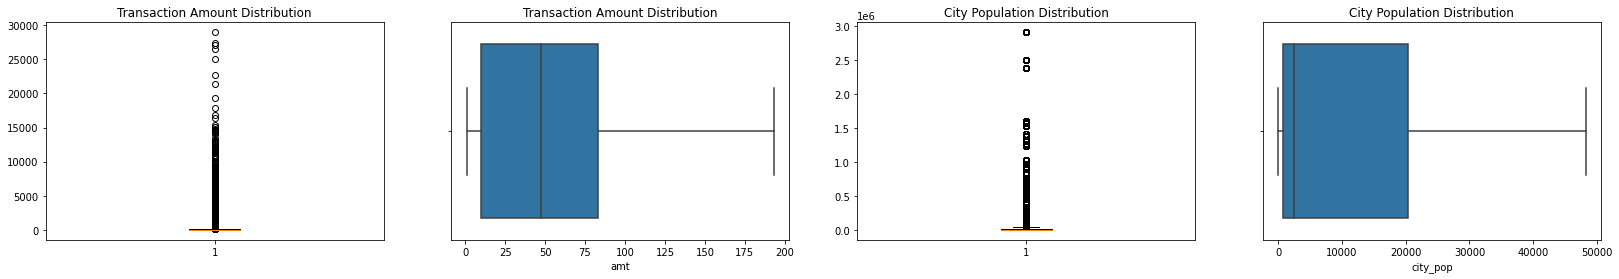

In [40]:
# Identify Outliers

plt.subplot(141)
plt.boxplot(credit_final['amt'])
plt.title("Transaction Amount Distribution")

plt.subplots_adjust(left=0.4,right=4)


plt.subplot(142)
sns.boxplot(credit_final['amt'],showfliers=False)
# plt.yscale('log')
plt.title("Transaction Amount Distribution")

plt.subplot(143)
plt.boxplot(credit_final['city_pop'])
plt.title("City Population Distribution")


plt.subplot(144)
sns.boxplot(credit_final['city_pop'],showfliers=False)
# plt.yscale('log')
plt.title("City Population Distribution")


plt.show()

The plots of transaction amount and City Population suggest large number of outliers in both the features. These will be treated using the appropriate methods below

**Outlier Treatment**

In [24]:

# 1. credit_final['amt]
## Method used: Capping using IQR method

#Step 1: Defining upper and lower bounds

q1=credit_final['amt'].quantile(0.25)
q3=credit_final['amt'].quantile(0.999)
print("The first quantile,Q1, of the amount feature is",q1,'/n',"The third quantile,Q3, of the amount feature is",q3)

iqr=q3=q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

print("Upper Bound:",upper_bound)
print("Lower Bound:",lower_bound)


#Step 2. Capping the outliers
credit_final.loc[(credit_final['amt']>upper_bound),'amt']=upper_bound


The first quantile,Q1, of the amount feature is 9.64 /n The third quantile,Q3, of the amount feature is 1517.2410500000465
Upper Bound: 24.1
Lower Bound: -4.82


In [25]:
# 2. City Population
## Method used: Binning

#Step 1: Defining upper and lower bounds

q1=credit_final['city_pop'].quantile(0.25)
q3=credit_final['city_pop'].quantile(0.99)
print("The first quantile,Q1, of the city population feature is",q1,"\n","The third quantile,Q3, of the city population feature is",q3)

# Inspecting the records which are flagged as fraud 

pop_outliers=credit_final[(credit_final['city_pop']>q3)]
pop_outliers_fraud=pop_outliers.loc[pop_outliers['is_fraud']==1]
pop_outliers_fraud.sort_values(by='city_pop',ascending=False).count()

The first quantile,Q1, of the city population feature is 741.0 
 The third quantile,Q3, of the city population feature is 1577385.0


cc_num                 83
merchant               83
category               83
amt                    83
zip                    83
lat                    83
long                   83
city_pop               83
trans_num              83
merch_lat              83
merch_long             83
is_fraud               83
Transaction_date       83
Trans_time_range       83
City_Fraud_Risk        83
Merchant_Fraud_Risk    83
dtype: int64

As large as 83 fraudulent transactions have happened even at the 99th percentile. Capping or deleting records will make us lose data. Hence, going ahead with binning.


In [26]:
#Step 2. Binning

credit_final['City_Pop_Bins']=pd.cut(credit_train['city_pop'],[-1,741,2443,186140,525713,2906700],labels=['Very Low','Low','Medium','High','Very High'])
round(credit_final['City_Pop_Bins'].value_counts(normalize=True)*100,2)

Medium       40.15
Very Low     24.98
Low          24.97
High          4.99
Very High     4.91
Name: City_Pop_Bins, dtype: float64

In [27]:
# Now a new column indicating the population of cities is created, city_pop can be dropped. 

credit_final.drop('city_pop',axis=1,inplace=True)

In [45]:
#Test for Skewness
credit_final.skew()

cc_num         2.851074
amt           -0.992557
zip            0.078950
lat           -0.191999
long          -1.146919
merch_lat     -0.188097
merch_long    -1.143933
is_fraud      13.745675
dtype: float64

#### **3.1 Univariate Analysis**

In [42]:
# Find the unique values in each feature
print("Conclusion:")
print("The unique values in credit card numbers are {}".format(credit_final['cc_num'].nunique()))
print("The unique merchants are {}".format(credit_final['merchant'].nunique()))
print("The unique values in categories are {}".format(credit_final['category'].nunique()))




Conclusion:
The unique values in credit card numbers are 999
The unique merchants are 693
The unique values in categories are 14


Such large number of unique values will be difficult to deal with during model building process. Therefore it is essential to label them into appropriate categories for ease of model building.

The unique values of credit card numbers is only 999 in a dataset with over 180,0000 rows which cleearly indicates multiple transactions made by the same customer at various merchants in 14 categories of shopping

In [28]:
numvars=['amt','lat','long','merch_lat','merch_long']

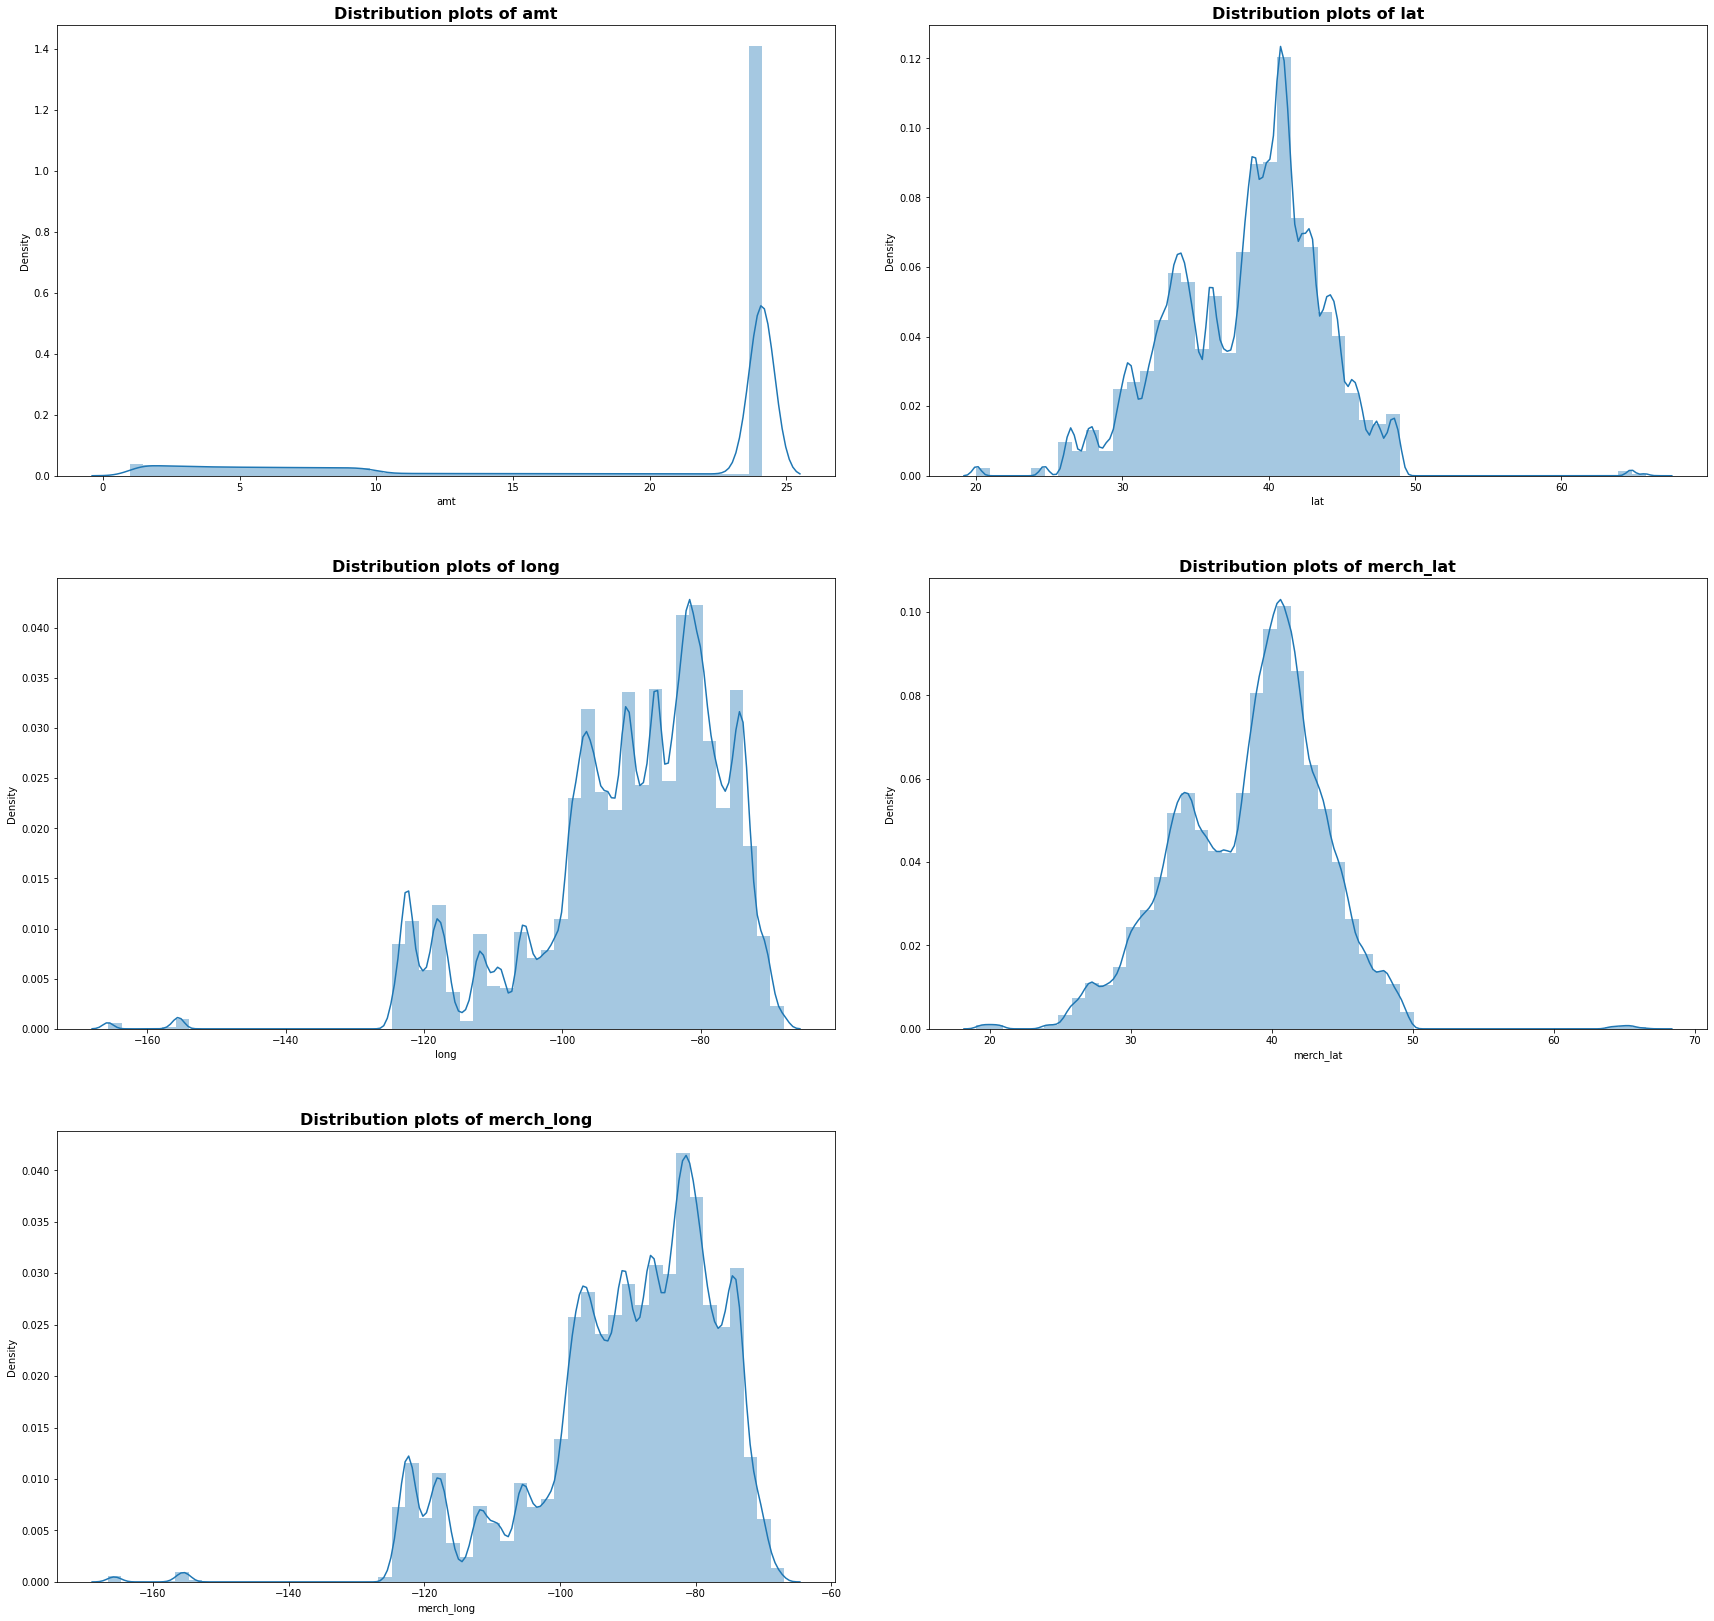

In [48]:

plt.figure(figsize = (25,30))
for var in enumerate(numvars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(credit_final[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

#### **3.2 Bivariate Analysis**

The amount feature is highly skewed to the left

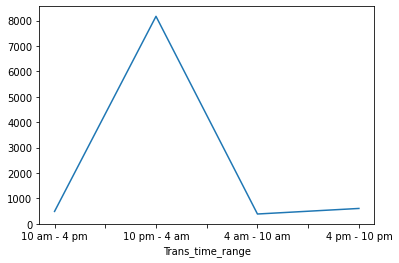

In [49]:
#Inspect the transaction timing when fraudulent transactions occur
#When is_fraud=1 vs transaction_time

#This dataframe only has frauds
df_fraud = credit_final[credit_final.is_fraud == 1]

#df_fraud.groupby('Transaction_Time').agg('is_fraud').count().plot(kind='line', x='Transaction_Time', y='is_fraud')
df_fraud.groupby('Trans_time_range').agg('is_fraud').count().plot( x='Trans_time_range', y='is_fraud')
#df_fraud.plot(kind='line', x='Transaction_Time', y='is_fraud')


 The plot between the transaction time and number of fraudulent transactions suggest that the highest number of frauds happened between 10 pm to around 5:00 pm. This is when the bank has to be most alert. 

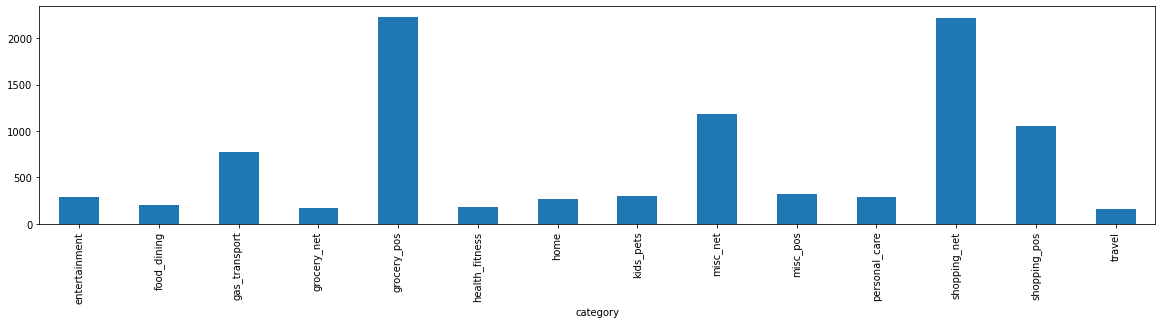

In [50]:
# Category vs is_fraud

plt.figure(figsize=(20,4))
df_fraud.groupby('category').agg('is_fraud').count().plot(kind='bar',x='merchant', y='is_fraud')



The bar chart above suggests there are highest number of fraudulent transactions happening at grocery Point of Sale followed by  internet shopping.

In [51]:
# Find the merchants with highest frequency of fraud

risk_merchant=df_fraud.merchant.value_counts()
print("A high number of fraudulent transactions have happened at the following merchants:","\n",risk_merchant.head(10))
print("The least number of fraudulent transactions have happened in the following merchants:","\n",risk_merchant.tail(5))

A high number of fraudulent transactions have happened at the following merchants: 
 Kilback LLC       62
Rau and Sons      60
Kozey-Boehm       60
Doyle Ltd         57
Terry-Huel        56
Kuhn LLC          55
Boyer PLC         55
Kuhic LLC         53
Cormier LLC       53
Kiehn-Emmerich    53
Name: merchant, dtype: int64
The least number of fraudulent transactions have happened in the following merchants: 
 Prosacco, Kreiger and Kovacek    1
Parker, Nolan and Trantow        1
Schaefer, Fay and Hilll          1
Deckow-Dare                      1
Schumm, McLaughlin and Carter    1
Name: merchant, dtype: int64


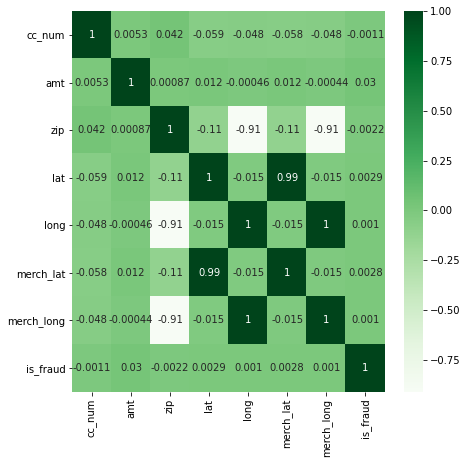

In [52]:
# Let's see the correlation matrix 
plt.figure(figsize = (7,7))        # Size of the figure
sns.heatmap(credit_final.corr(),annot = True,cmap="Greens")

plt.show()

### **4. Data Preparation**

In [53]:
# Lets have the dataframe here to get a view of it

credit_final.head(2)

cc_num                   merchant     category    amt    zip  \
0  2703186189652095       Rippin, Kub and Mann     misc_net   4.97  28654   
1      630423337322  Heller, Gutmann and Zieme  grocery_pos  24.10  99160   

       lat      long                         trans_num  merch_lat  merch_long  \
0  36.0788  -81.1781  0b242abb623afc578575680df30655b9  36.011293  -82.048315   
1  48.8878 -118.2105  1f76529f8574734946361c461b024d99  49.159047 -118.186462   

   is_fraud Transaction_date Trans_time_range City_Fraud_Risk  \
0         0       2019-01-01     10 pm - 4 am          Medium   
1         0       2019-01-01     10 pm - 4 am          Medium   

  Merchant_Fraud_Risk City_Pop_Bins  
0                High        Medium  
1                High      Very Low

In [54]:
credit_final.shape

(1852394, 16)

#### **4.1 Dummy Variables Creation**

In [29]:
# Create Dummy variables

dummy1 = pd.get_dummies(credit_final[['category','Trans_time_range','City_Fraud_Risk','Merchant_Fraud_Risk','City_Pop_Bins'	]], drop_first=True)
dummy1.head()

category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  1                     0                   0   
4                  0                     0                   0   

   City_Pop_Bins_Very High  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [56]:
dummy1.shape

(1852394, 25)

In [30]:
# Adding the results to the master dataframe
credit_final = pd.concat([credit_final, dummy1], axis=1)

In [31]:
credit_final.head()

cc_num                      merchant       category    amt  \
0  2703186189652095          Rippin, Kub and Mann       misc_net   4.97   
1      630423337322     Heller, Gutmann and Zieme    grocery_pos  24.10   
2    38859492057661                Lind-Buckridge  entertainment  24.10   
3  3534093764340240  Kutch, Hermiston and Farrell  gas_transport  24.10   
4   375534208663984                 Keeling-Crist       misc_pos  24.10   

     zip      lat      long                         trans_num  merch_lat  \
0  28654  36.0788  -81.1781  0b242abb623afc578575680df30655b9  36.011293   
1  99160  48.8878 -118.2105  1f76529f8574734946361c461b024d99  49.159047   
2  83252  42.1808 -112.2620  a1a22d70485983eac12b5b88dad1cf95  43.150704   
3  59632  46.2306 -112.1138  6b849c168bdad6f867558c3793159a81  47.034331   
4  24433  38.4207  -79.4629  a41d7549acf90789359a9aa5346dcb46  38.674999   

   merch_long  is_fraud Transaction_date Trans_time_range City_Fraud_Risk  \
0  -82.048315         0       2019-01-01     10 pm - 4 am          Medium   
1 -118.186462         0       2019-01-01     10 pm - 4 am          Medium   
2 -112.154481         0       2019-01-01     10 pm - 4 am             Low   
3 -112.561071         0       2019-01-01     10 pm - 4 am          Medium   
4  -78.632459         0       2019-01-01     10 pm - 4 am          Medium   

  Merchant_Fraud_Risk City_Pop_Bins  category_food_dining  \
0                High        Medium                     0   
1                High      Very Low                     0   
2                 Low        Medium                     0   
3                 Low           Low                     0   
4                 Low      Very Low                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     1   
2                       0                     0                     0   
3                       1                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        0              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  0                       0   
4                  0                  1                       0   

   category_shopping_net  category_shopping_pos  category_travel  \
0                      0                      0                0   
1                      0                      0                0   
2                      0                      0                0   
3                      0                      0                0   
4                      0                      0                0   

   Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
0                              1                              0   
1                              1                              0   
2                              1                              0   
3                              1                              0   
4                              1                              0   

   Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  City_Fraud_Risk_Medium  \
0                              0                    0                       1   
1                              0                    0               

In [59]:
credit_final.shape

(1852394, 41)

In [32]:
# Drop the original features which have been one-hot encoded

credit_final.drop(['category','Trans_time_range','City_Fraud_Risk','Merchant_Fraud_Risk','City_Pop_Bins'	],axis=1,inplace=True)

In [33]:
# Feature such as ['cc_num','merchant','zip'] seem to be adding less value at this stage.
# cc_num have over 900 unique values while merchant column has already been used to identify high to low risk merchants. 
#'zip' is not required as the lat and long attributes are enough to convey cardholder's location.

credit_final.drop(['merchant','zip'],axis=1,inplace=True)



In [34]:
credit_final.head()


cc_num    amt      lat      long  \
0  2703186189652095   4.97  36.0788  -81.1781   
1      630423337322  24.10  48.8878 -118.2105   
2    38859492057661  24.10  42.1808 -112.2620   
3  3534093764340240  24.10  46.2306 -112.1138   
4   375534208663984  24.10  38.4207  -79.4629   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date  category_food_dining  category_gas_transport  \
0       2019-01-01                     0                       0   
1       2019-01-01                     0                       0   
2       2019-01-01                     0                       0   
3       2019-01-01                     0                       1   
4       2019-01-01                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              0                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                 

In [63]:
credit_final.shape

(1852394, 34)

In [35]:
#Copying the dataframe with dummy variables to derive historical variables later, to compare results with models without them.
credit_final_hist=credit_final.copy()

In [83]:
# Let's drop transaction date from the data to be used for model building. 
#This dataframe,without historical variables, will be used to build first few models.

credit_final_model=credit_final.drop(['Transaction_date','cc_num','trans_num'],axis=1)
credit_final_model.head()

amt      lat      long  merch_lat  merch_long  is_fraud  \
0   4.97  36.0788  -81.1781  36.011293  -82.048315         0   
1  24.10  48.8878 -118.2105  49.159047 -118.186462         0   
2  24.10  42.1808 -112.2620  43.150704 -112.154481         0   
3  24.10  46.2306 -112.1138  47.034331 -112.561071         0   
4  24.10  38.4207  -79.4629  38.674999  -78.632459         0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  1                     0                   0   
4                  0                     0                  

#### **4.2 Final Data for Modelling**

In [84]:
credit_final_model.head()

amt      lat      long  merch_lat  merch_long  is_fraud  \
0   4.97  36.0788  -81.1781  36.011293  -82.048315         0   
1  24.10  48.8878 -118.2105  49.159047 -118.186462         0   
2  24.10  42.1808 -112.2620  43.150704 -112.154481         0   
3  24.10  46.2306 -112.1138  47.034331 -112.561071         0   
4  24.10  38.4207  -79.4629  38.674999  -78.632459         0   

   category_food_dining  category_gas_transport  category_grocery_net  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       1                     0   
4                     0                       0                     0   

   category_grocery_pos  category_health_fitness  category_home  \
0                     0                        0              0   
1                     1                        0              0   
2                     0                        0              0   
3                     0                        0              0   
4                     0                        0              0   

   category_kids_pets  category_misc_net  category_misc_pos  \
0                   0                  1                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
0                  0                     1                   0   
1                  0                     0                   0   
2                  0                     1                   0   
3                  1                     0                   0   
4                  0                     0                  

In [85]:
credit_final_model.shape

(1852394, 31)

### **4.1 Train_Test Split**

In [86]:
# Save the dataframe without the target variable in X and the target variable,is_fraud, in y
X=credit_final_model.drop('is_fraud',axis=1)
y=credit_final_model['is_fraud']

In [87]:
from sklearn.model_selection import train_test_split

# Performing Stratified train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0, stratify = y)

In [88]:
print("The shape of the train dataset is ",X_train.shape)
print("The shape of the test dataset is ",X_test.shape)

The shape of the train dataset is  (1296675, 30)
The shape of the test dataset is  (555719, 30)


In [89]:
X_train.head(2)

amt      lat     long  merch_lat  merch_long  category_food_dining  \
148639   5.53  44.4477 -93.4252  43.794018  -93.772028                     0   
371300  24.10  36.3850 -98.0727  36.802023  -98.086283                     0   

        category_gas_transport  category_grocery_net  category_grocery_pos  \
148639                       0                     0                     0   
371300                       0                     0                     0   

        category_health_fitness  category_home  category_kids_pets  \
148639                        0              0                   0   
371300                        0              0                   0   

        category_misc_net  category_misc_pos  category_personal_care  \
148639                  0                  0                       0   
371300                  1                  0                       0   

        category_shopping_net  category_shopping_pos  category_travel  \
148639                      1                      0                0   
371300                      0                      0                0   

        Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
148639                              0                              0   
371300                              0                              1   

        Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  \
148639                              0                    1   
371300                              0                    0   

        City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
148639                       0                        0   
371300                       1                        0   

        Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
148639                           0                              1   
371300                           0                              0   

        City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
148639                  0                     1                   0   
371300                  1                     0                   0   

        City_Pop_Bins_Very High  
148639                        0  
371300                        0

In [90]:

100*credit_final.is_fraud.value_counts(normalize=True)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

In [91]:

100*y_train.value_counts(normalize=True)

0    99.478975
1     0.521025
Name: is_fraud, dtype: float64

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 148639 to 1119928
Data columns (total 30 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   amt                            1296675 non-null  float64
 1   lat                            1296675 non-null  float64
 2   long                           1296675 non-null  float64
 3   merch_lat                      1296675 non-null  float64
 4   merch_long                     1296675 non-null  float64
 5   category_food_dining           1296675 non-null  uint8  
 6   category_gas_transport         1296675 non-null  uint8  
 7   category_grocery_net           1296675 non-null  uint8  
 8   category_grocery_pos           1296675 non-null  uint8  
 9   category_health_fitness        1296675 non-null  uint8  
 10  category_home                  1296675 non-null  uint8  
 11  category_kids_pets             1296675 non-null  uint8  
 12  category_

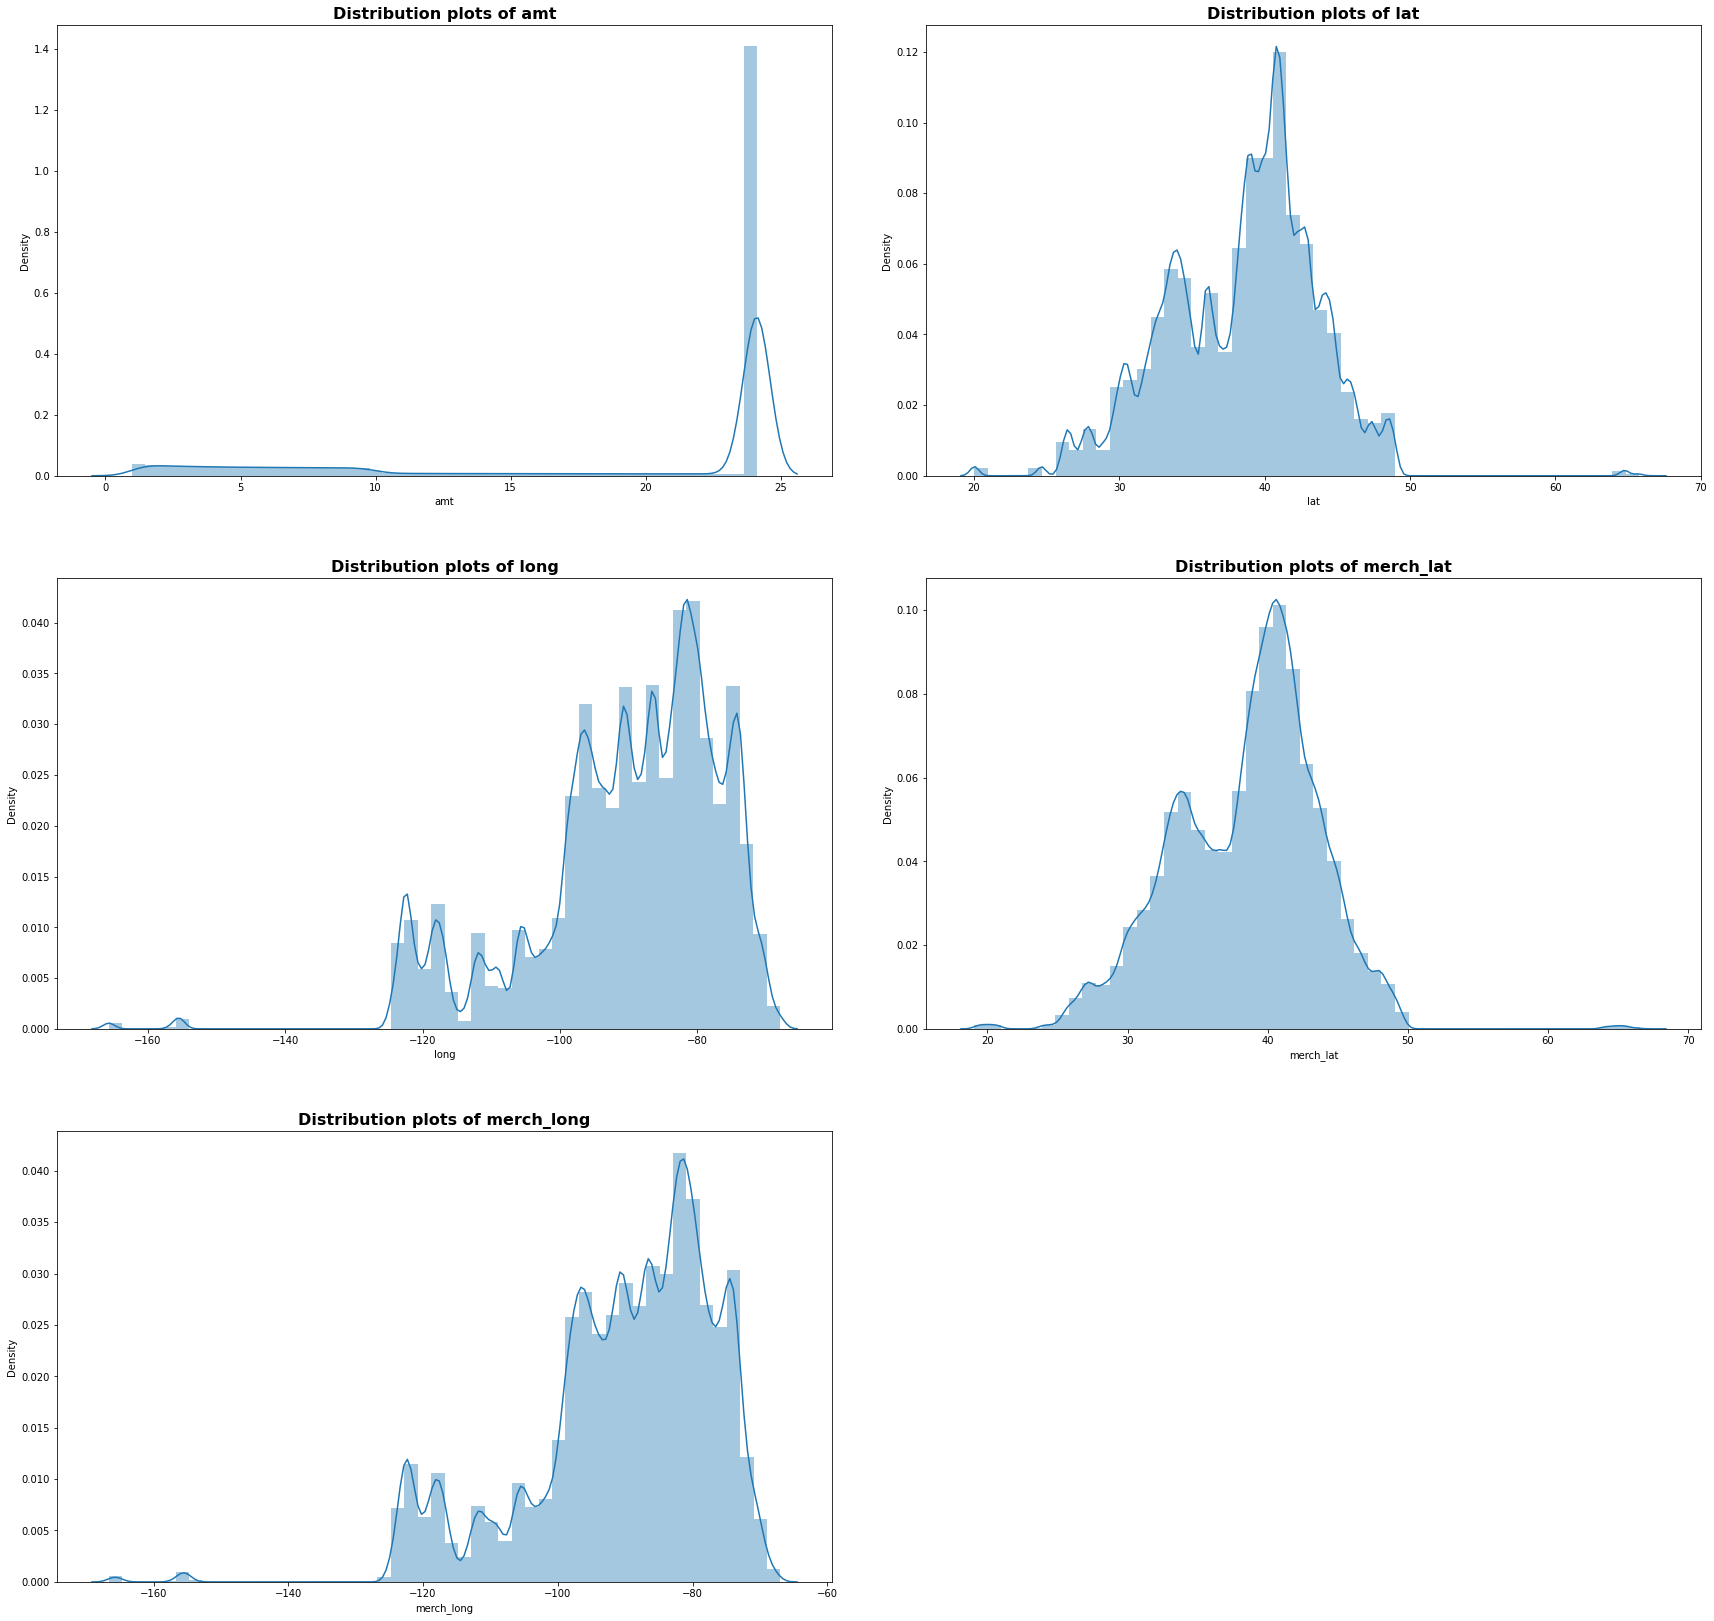

In [93]:
# # Check the skewness 
plt.figure(figsize = (25,30))
for var in enumerate(numvars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(X_train[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

##### **Power Transformation- Handlling Skewness**

In [94]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize= True)



In [95]:
X_train[numvars] = pt.fit_transform(X_train[numvars])
X_test[numvars]= pt.transform(X_test[numvars])


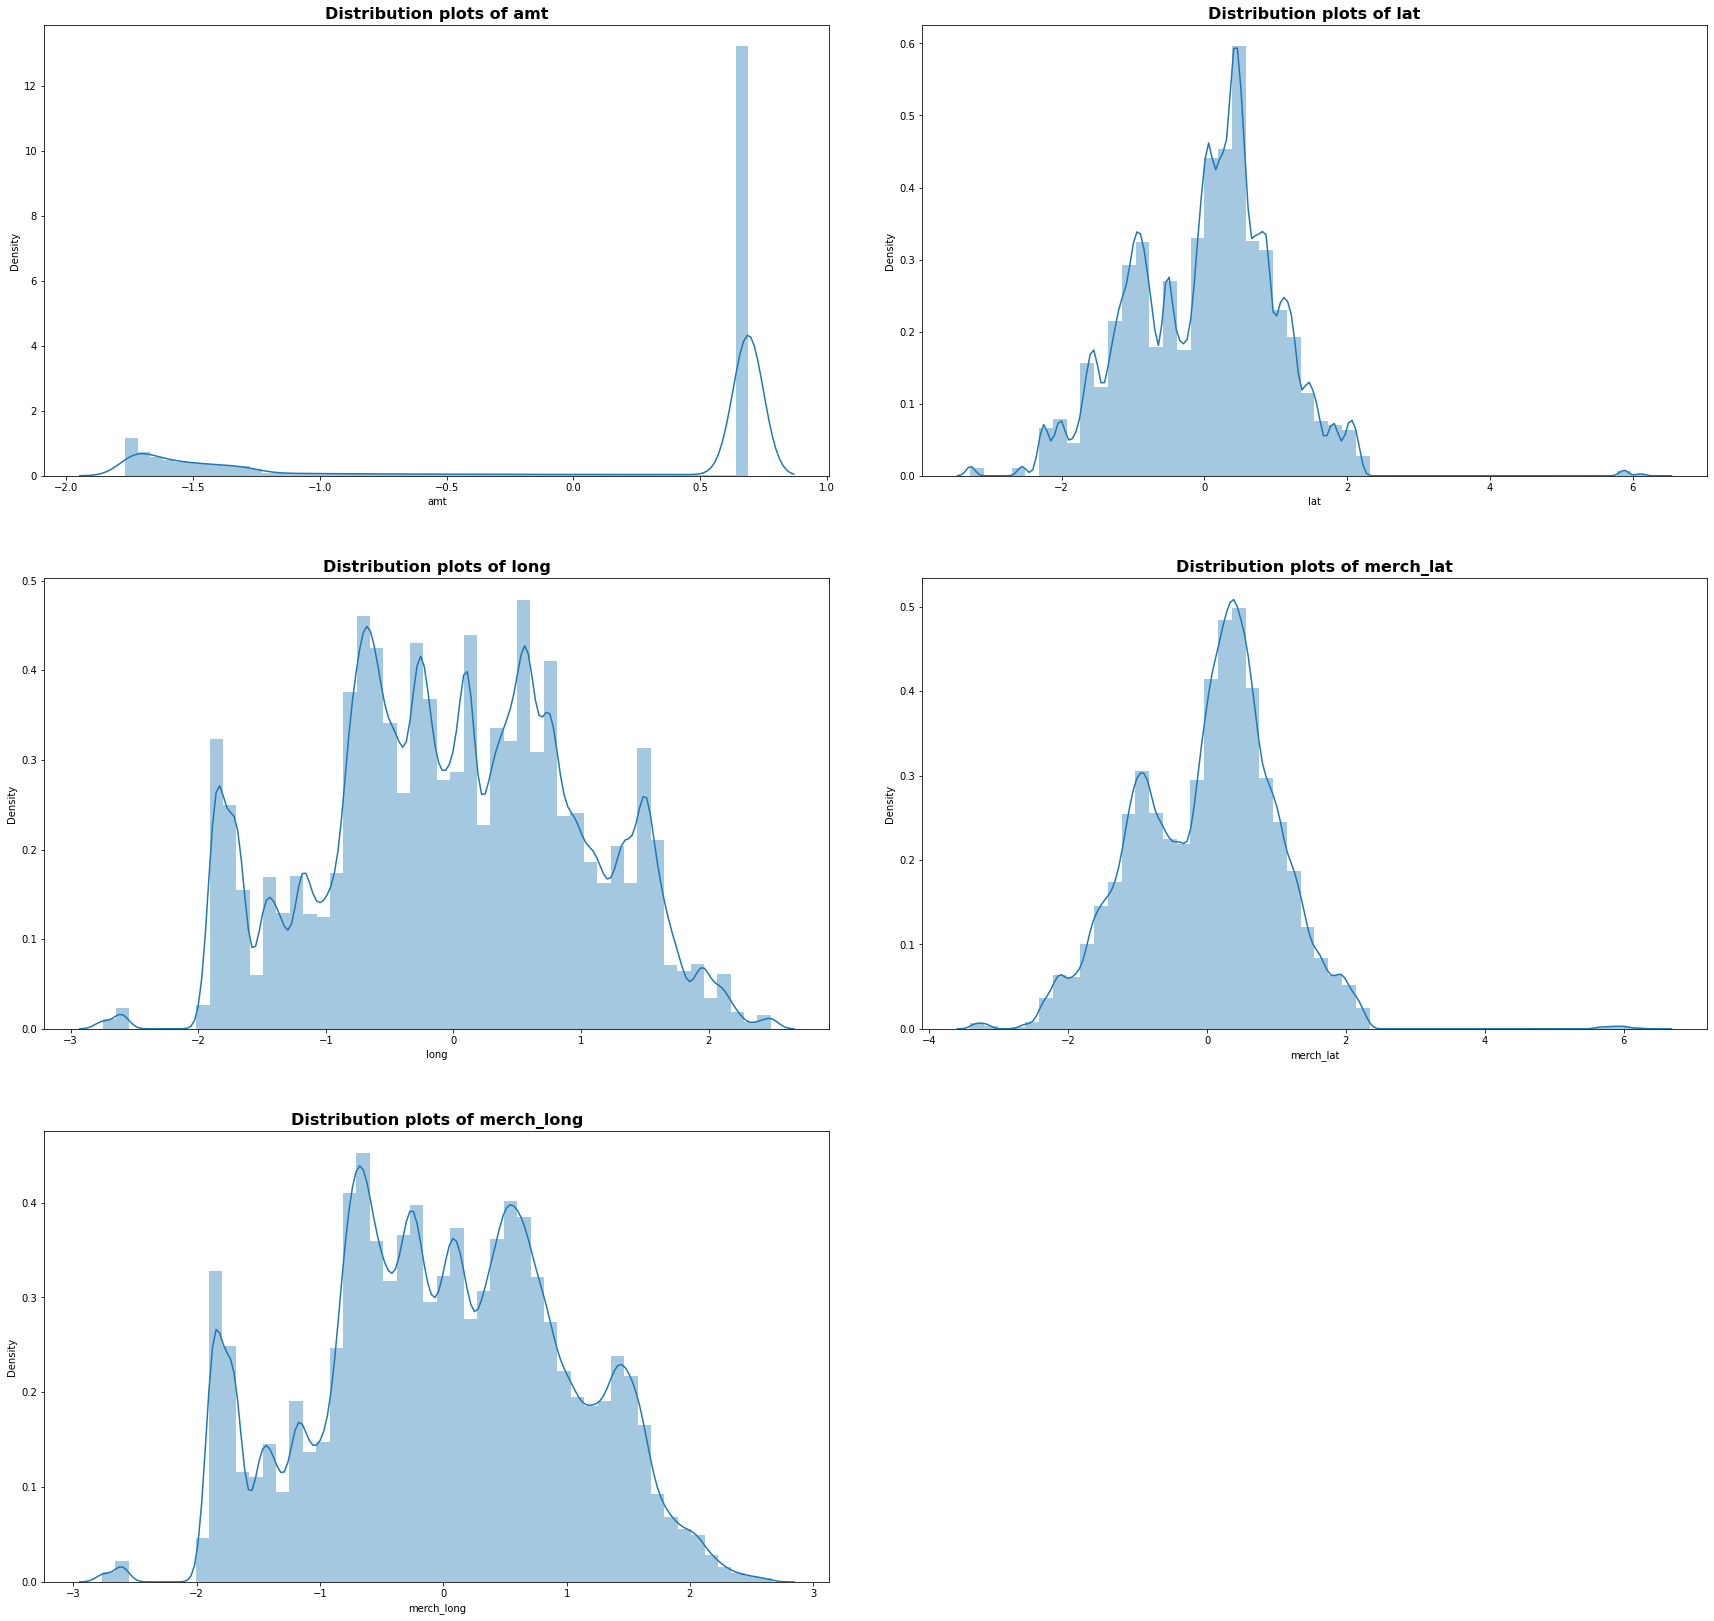

In [ ]:
# # Check the skewness 
plt.figure(figsize = (25,30))
for var in enumerate(numvars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(X_train[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

The data is now split into two and its skeweness has been handled using Power Transformation

As identified earlier, the data is **highly imbalanced** and needs to be equalized. This will be done using **Class of Weight** method. There are other methods like SMOTE, ADASYN,Oversampling or Undersampling but these change the data,making it more difficult and slower to deal with them in some case. 

Class weights directly modify the loss function by giving more (or less) penalty to the classes with more (or less) weight. In effect, one is basically sacrificing some ability to predict the lower weight class (the majority class for unbalanced datasets) by purposely biasing the model to favor more accurate predictions of the higher weighted class (the minority class)

### **5. Model Building**

The following models will be attempted to come up with a decent model to predict frauds. 

1. Baseline Linear Model- Logistic Regression
2. Decision Trees- With and Without Hyperparameter tuning
3. Random Forests- With and Without Hyperparamter Tuning
4. The dataset's copy,credit_final_hist, created to derive histoical variables will then be modified to have the Transaction Date as the index and then calculating the moving average of amount over the last 60 days. This data will then be prepared with Train-Test split and building a Decision Tree to compare results. 


Let's begin with the first baseline model. The primary goal is to develop a model with a good recall value, that saves the cost the most. An acceptable value of accuracy will be also be attempted to achieve.It is of utmost importance that the model predicts fraudulent transaction correctly, hence the recall value is the most important metric to evaluate the model with an acceptable range of accurancy


#### **5.1 Logistic Regression- Model 1**

In [ ]:
#Without balancing the data, just to explore.

# Weight of Class
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("Recall/Sensitivity : ", metrics.recall_score(y_test, y_pred))

Accuracy :  0.9947905326253016
Recall/Sensitivity :  0.0


In [ ]:
# # Handling the data imbalance

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
y_train_pred=logreg.predict(X_train)
y_test_pred=logreg.predict(X_test)
print("Train_set perfomance:","\n")
print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
print("AUC-ROC:",metrics.roc_auc_score(y_train,y_train_pred))
print("Precision Score:",metrics.precision_score(y_train,y_train_pred))
print("Recall Score/Sensitivity:",metrics.recall_score(y_train,y_train_pred))
print("F1 Score:",metrics.f1_score(y_train,y_train_pred),"\n")

print("Test Set Performance:","\n")
print("Confusion Matrix:","\n",confusion_matrix(y_test,y_test_pred),"\n")
print("Accuracy Score:",accuracy_score(y_test,y_test_pred))
print("AUC-ROC:",metrics.roc_auc_score(y_test,y_test_pred))
print("Precision Score:",metrics.precision_score(y_test,y_test_pred))
print("Recall Score/Sensitivity:",metrics.recall_score(y_test,y_test_pred))
print("F1 Score:",metrics.f1_score(y_test,y_test_pred))

Train_set perfomance: 

Accuracy Score: 0.7894884994312376
AUC-ROC: 0.810265407539042
Precision Score: 0.02024214157244243
Recall Score/Sensitivity: 0.8312611012433393
F1 Score: 0.03952188094877848 

Test Set Performance: 

Confusion Matrix: 
 [[436051 116773]
 [   437   2458]] 

Accuracy Score: 0.789084051472057
AUC-ROC: 0.818910055406016
Precision Score: 0.020615443970108446
Recall Score/Sensitivity: 0.8490500863557858
F1 Score: 0.040253508671372194


The performance of Logistic Regression model seems fine but let's attempt to make better models with algorithms below.

#### **5.2 Decision Trees- Model 2**

###### **5.2.1 Functions to create the tree and evaluate models**

In [56]:
# Function to create the tree

def get_dt_graph(dt_classifier):
        dot_data=StringIO()
        export_graphviz(dt_classifier,out_file=dot_data,filled=True,
                rounded=True,feature_names=X.columns,
               class_names=['Fraud','No Fraud'])
        graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
        return graph

In [52]:
# Function for model evaluation
def model_evaluator(dt_classifier):
    y_train_pred=dt_classifier.predict(X_train)
    y_test_pred=dt_classifier.predict(X_test)
    print("Train_set perfomance:","\n")
    print("Accuracy Score:",accuracy_score(y_train,y_train_pred))
    print("AUC-ROC:",metrics.roc_auc_score(y_train,y_train_pred))
    print("Precision Score:",metrics.precision_score(y_train,y_train_pred))
    print("Recall Score/Sensitivity:",metrics.recall_score(y_train,y_train_pred))
    print("F1 Score:",metrics.f1_score(y_train,y_train_pred),"\n")

    print("Test Set Performance:","\n")
    print("Confusion Matrix:","\n",confusion_matrix(y_test,y_test_pred),"\n")

    print("Accuracy Score:",accuracy_score(y_test,y_test_pred))
    print("AUC-ROC:",metrics.roc_auc_score(y_test,y_test_pred))
    print("Precision Score:",metrics.precision_score(y_test,y_test_pred))
    print("Recall Score/Sensitivity:",metrics.recall_score(y_test,y_test_pred))
    print("F1 Score:",metrics.f1_score(y_test,y_test_pred))

##### **5.2.12 Model Development**

In [ ]:
#Instantiating the Decision Tree object
dt = DecisionTreeClassifier(max_depth=3,random_state=42,class_weight='balanced')

In [ ]:
# Training the Train data using the .fit method
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

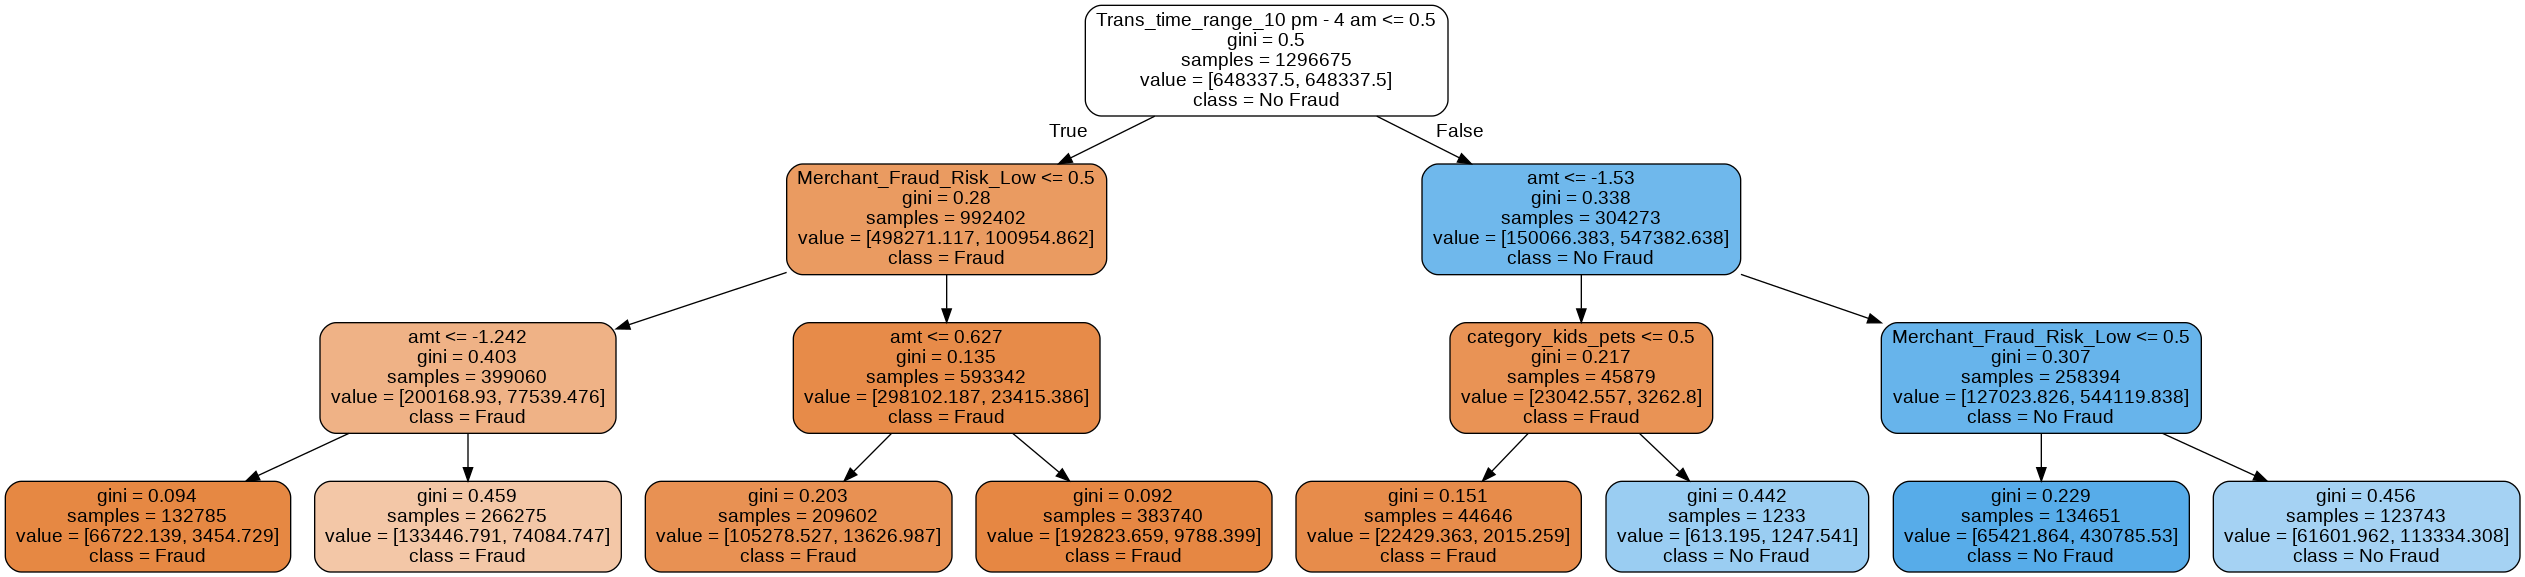

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
gph=get_dt_graph(dt)
Image(gph.create_png())

##### **5.2.11 Model Evaluation**

In [ ]:
model_evaluator(dt)

Train_set perfomance: 

Accuracy Score: 0.8033300557194363
AUC-ROC: 0.8221550182580825
Precision Score: 0.021889094739761274
Recall Score/Sensitivity: 0.8411782119597395
F1 Score: 0.042667887965823645 

Test Set Performance: 

Confusion Matrix: 
 [[443843 108981]
 [   437   2458]] 

Accuracy Score: 0.8031055263541466
AUC-ROC: 0.8259575063126338
Precision Score: 0.02205691005841761
Recall Score/Sensitivity: 0.8490500863557858
F1 Score: 0.04299683383770357


This model has a decent Recall value and accuracy score on the test data set.

##### **5.2.2 Decision Tree with HyperParameter Tuning**

###### **5.2.21 Decision Tree-Tuned Model 1**

In [ ]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_k=StratifiedKFold(n_splits=2,random_state=100)

#Instantiating the Decision Tree Classfier

dtc = DecisionTreeClassifier()

# Defining parameters for random search

params={
        'max_depth':[10,15,20],
        'min_samples_leaf':[10,30,50,60,100],
        'min_samples_split':[10,20,50,70],
        'criterion':['gini'],
        'class_weight':['balanced']
}

In [ ]:
#Instantiating random search CV to with the parameters defined above
from sklearn.model_selection import RandomizedSearchCV
rand_search=RandomizedSearchCV(estimator=dtc,param_distributions=params,cv=strat_k,random_state=100,verbose=True)

#Fitting RandomizedSearchCV on X_train and Y_Train

rand_search.fit(X_train,y_train)



Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=100, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
   

In [ ]:
tuned_dt=rand_search.best_estimator_
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.20793 to fit



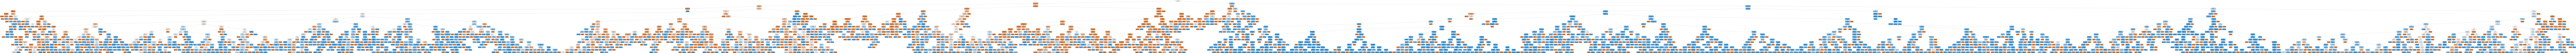

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
gph=get_dt_graph(tuned_dt)
Image(gph.create_png())

###### **5.2.22 Tuned Model Evaluation**

In [ ]:
import sklearn.metrics as metrics
model_evaluator(tuned_dt)

Train_set perfomance: 

Accuracy Score: 0.9164594057878805
AUC-ROC: 0.9549924819931379
Precision Score: 0.058391812102713936
Recall Score/Sensitivity: 0.9939313203078745
F1 Score: 0.1103034782965792 

Test Set Performance: 

Confusion Matrix: 
 [[505463  47361]
 [   644   2251]] 

Accuracy Score: 0.9136164140509861
AUC-ROC: 0.8459382341875737
Precision Score: 0.04537208739821011
Recall Score/Sensitivity: 0.7775474956822107
F1 Score: 0.08574094882587084


The tree has outgrown immensely making it difficult to interpret. The Recall value is lower when compared to the previous model in 5.2.12

#### **5.3 Random Forests- Model 3**

In [ ]:
X_train.head()

amt       lat      long  merch_lat  merch_long  \
148639  -1.582159  1.182900 -0.459131   1.037568   -0.482357   
371300   0.689445 -0.451894 -0.767689  -0.368121   -0.767020   
1057490  0.689445 -0.705400 -0.132477  -0.841378   -0.187621   
558949  -1.758266 -0.030680 -0.494296  -0.225687   -0.531125   
1128948  0.689445  0.374813  0.826563   0.175449    0.847875   

         category_food_dining  category_gas_transport  category_grocery_net  \
148639                      0                       0                     0   
371300                      0                       0                     0   
1057490                     0                       0                     1   
558949                      0                       0                     0   
1128948                     1                       0                     0   

         category_grocery_pos  category_health_fitness  category_home  \
148639                      0                        0              0   
371300                      0                        0              0   
1057490                     0                        0              0   
558949                      0                        0              0   
1128948                     0                        0              0   

         category_kids_pets  category_misc_net  category_misc_pos  \
148639                    0                  0                  0   
371300                    0                  1                  0   
1057490                   0                  0                  0   
558949                    0                  0                  0   
1128948                   0                  0                  0   

         category_personal_care  category_shopping_net  category_shopping_pos  \
148639                        0                      1                      0   
371300                        0                      0                      0   
1057490                       0                      0                      0   
558949                        0                      0                      1   
1128948                       0                      0                      0   

         category_travel  Trans_time_range_10 pm - 4 am  \
148639                 0                              0   
371300                 0                              0   
1057490                0                              0   
558949                 0                              0   
1128948                0                              0   

         Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
148639                               0                              0   
371300                               1                              0   
1057490                              1                              0   
558949                               1                              0   
1128948                              0                              1   

         City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
148639                     1                       0                        0   
371300                     0                       1                        0   
1057490                    0                       1                        1   
558949                     1                       0                        0   
1128948                    0                       1                        1   

         Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
148639                            0                              1   
371300                            0                              0   
1057490                           0                              0   
558949                            1                              0   
1128948                           0                              0   

         City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
148639                   0             

In [ ]:
y_train.value_counts()

0    1289919
1       6756
Name: is_fraud, dtype: int64

In [ ]:
rf=RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10,class_weight='balanced',oob_score=True)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=3, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=3, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=3, max_featu

In [ ]:
model_evaluator(rf)

Train_set perfomance: 

Accuracy Score: 0.7233169452638479
AUC-ROC: 0.8007858180988651
Precision Score: 0.01632086619582841
Recall Score/Sensitivity: 0.8790704558910598
F1 Score: 0.03204675080804865 

Test Set Performance: 

Confusion Matrix: 
 [[399295 153529]
 [   316   2579]] 

Accuracy Score: 0.7231604461967289
AUC-ROC: 0.8065643022004374
Precision Score: 0.016520613933943166
Recall Score/Sensitivity: 0.890846286701209
F1 Score: 0.03243963950365716


In [ ]:
rf.oob_score_

0.7363202035976633

**Conclusion:** The recall value is good but the accuracy score is low. We will try to fine tune this model to achieve better results.

#### **5.3.1 Random Forests- HyperParameter Tuned Model**

##### **5.3.11 Model I**

In [ ]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_rf1=StratifiedKFold(n_splits=3,random_state=100)

#Instantiating the Random Forest Classfier

rf1 = RandomForestClassifier(random_state=100,n_jobs=-1,verbose=1)

# Defining parameters for random search

params={
        'max_depth':[10,15,20],
        'min_samples_leaf':[10,15,20,30],
        'min_samples_split':[10,20,50],
        'max_features':[5,10],
        'n_estimators':[10,50],
        'class_weight':['balanced'],
        'oob_score':['True']
}

In [ ]:

#Instatiating RandomSearch CV with the parameters above
random_search_1=RandomizedSearchCV(estimator=rf1,param_distributions=params,verbose=1,n_jobs=-1,cv=strat_rf1,n_iter=10)

In [ ]:
#Fitting Random Search on X& Y trains
random_search_1.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 23.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spl...
                     

In [ ]:
# Finding best estimators.
random_search_1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score='True', random_state=100, verbose=1,
                       warm_start=False)

###### **5.3.11.1 Model Evaluation-I**

In [ ]:
model_evaluator(random_search_1)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.6s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    7.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.9s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    3.1s finished


Train_set perfomance: 

Accuracy Score: 0.9399926735689359
AUC-ROC: 0.9551886785827713
Precision Score: 0.07790371637677027
Recall Score/Sensitivity: 0.9705447010065127
F1 Score: 0.1442303462232194 

Test Set Performance: 

Confusion Matrix: 
 [[518963  33861]
 [   667   2228]] 

Accuracy Score: 0.9378678792699188
AUC-ROC: 0.8541759023356714
Precision Score: 0.061736263127268695
Recall Score/Sensitivity: 0.7696027633851468
F1 Score: 0.11430330391955675


##### **5.3.12 Model II**

In [ ]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_rf2=StratifiedKFold(n_splits=3,random_state=100)

#Instantiating the Random Forest Classfier

rf2 = RandomForestClassifier(random_state=100,n_jobs=-1,verbose=1)

# Defining parameters for random search

params={
        'max_depth':[5,15,20],
        'min_samples_leaf':[10,15,20],
        'min_samples_split':[20,50,70,100],
        'max_features':[4,8,10],
        'n_estimators':[1, 2, 4, 8, 16,20,32, 64, 100, 200],
        'class_weight':['balanced'],
        'oob_score':['True']
}

In [ ]:
#Instatiating RandomSearch CV with the parameters above
random_search_2=RandomizedSearchCV(estimator=rf2,param_distributions=params,verbose=1,n_jobs=2,cv=strat_rf2,n_iter=10)

In [ ]:
#Fitting Random Search on X& Y trains
random_search_2.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 29.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    6.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spl...
                   ii

In [ ]:
# Finding best estimators.
random_search_2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=-1,
                       oob_score='True', random_state=100, verbose=1,
                       warm_start=False)

###### **5.3.12.1 Model Evaluation-II**

In [ ]:
model_evaluator(random_search_2)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished


Train_set perfomance: 

Accuracy Score: 0.9373651840283803
AUC-ROC: 0.8843701427246321
Precision Score: 0.0655058526964417
Recall Score/Sensitivity: 0.8308170515097691
F1 Score: 0.12143699360687127 

Test Set Performance: 

Confusion Matrix: 
 [[517940  34884]
 [  1099   1796]] 

Accuracy Score: 0.9352496495531015
AUC-ROC: 0.7786392541063516
Precision Score: 0.04896401308615049
Recall Score/Sensitivity: 0.6203799654576857
F1 Score: 0.09076437144662033


This model does not have a good recall value. It means that the model is not making correct predictions on fraud correctly. Therefore, we cannot use this model for deployment


##### **5.3.13 Model III**

In [ ]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_rf3=StratifiedKFold(n_splits=3,random_state=100)

#Instantiating the Random Forest Classfier

rf3 = RandomForestClassifier(random_state=100,n_jobs=2,verbose=1)

# Defining parameters for random search

params={
        'max_depth':[12,18],
        'min_samples_leaf':[20,50],
        'min_samples_split':[30,40],
        'max_features':[12,13,15],
        'class_weight':['balanced'],
        'oob_score':['True']
}

In [ ]:
#Instatiating RandomSearch CV with the parameters above
random_search_3=RandomizedSearchCV(estimator=rf3,param_distributions=params,verbose=1,n_jobs=2,cv=strat_rf3,n_iter=10)

In [90]:
#Fitting Random Search on X& Y trains
random_search_3.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed: 167.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  7.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_spl...
                     

In [92]:
# Finding best estimators.
random_search_3.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=18, max_features=13,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score='True', random_state=100, verbose=1,
                       warm_start=False)

###### **5.3.13.1 Model Evaluation-III**

In [94]:
model_evaluator(random_search_3)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   16.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    8.9s finished


Train_set perfomance: 

Accuracy Score: 0.9311778201939577
AUC-ROC: 0.9499483404851793
Precision Score: 0.06848999748890935
Recall Score/Sensitivity: 0.9689165186500888
F1 Score: 0.12793652034554198 

Test Set Performance: 

Confusion Matrix: 
 [[514119  38705]
 [   581   2314]] 

Accuracy Score: 0.9293059981753368
AUC-ROC: 0.8646479563047197
Precision Score: 0.05641288183524708
Recall Score/Sensitivity: 0.7993091537132988
F1 Score: 0.1053878034339846


This model seems to be performing well within acceptable ranges of Recall and accuracy. This can be tested further for cost benefit analysis

**Summary**

It is observed that the Decision Tree- Model ( 5.1.12) and the Random Forest- Model III(5.3.13) do better with a decent Recall Score and Accuracy compared to all other models developed. We will do a cost benefit analysis on the both of them to finalise a model.

In the following section, we will work with credit_final_hist which is a copy of the credit_final data with dummy variables. The agenda is to derive a historical variable on amount. credit_final_hist will again go through similar processes as above, including train_test_Split() to build a Decision Tree in an attempt to achieve better performance.

#### **5.4 Working with historical variables**

In [49]:
# Let us look at the data once again
credit_final_hist.head()

cc_num    amt      lat      long  \
0  2703186189652095   4.97  36.0788  -81.1781   
1      630423337322  24.10  48.8878 -118.2105   
2    38859492057661  24.10  42.1808 -112.2620   
3  3534093764340240  24.10  46.2306 -112.1138   
4   375534208663984  24.10  38.4207  -79.4629   

                          trans_num  merch_lat  merch_long  is_fraud  \
0  0b242abb623afc578575680df30655b9  36.011293  -82.048315         0   
1  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0   
2  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0   
3  6b849c168bdad6f867558c3793159a81  47.034331 -112.561071         0   
4  a41d7549acf90789359a9aa5346dcb46  38.674999  -78.632459         0   

  Transaction_date  cc_len  category_food_dining  category_gas_transport  \
0       2019-01-01      16                     0                       0   
1       2019-01-01      12                     0                       0   
2       2019-01-01      14                     0                       0   
3       2019-01-01      16                     0                       1   
4       2019-01-01      15                     0                       0   

   category_grocery_net  category_grocery_pos  category_health_fitness  \
0                     0                     0                        0   
1                     0                     1                        0   
2                     0                     0                        0   
3                     0                     0                        0   
4                     0                     0                        0   

   category_home  category_kids_pets  category_misc_net  category_misc_pos  \
0              0                   0                  1                  0   
1              0                   0                  0                  0   
2              0                   0                  0                  0   
3              0                   0                  0                  0   
4              0                   0                  0                  1   

   category_personal_care  category_shopping_net  category_shopping_pos  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   category_travel  Trans_time_range_10 pm - 4 am  \
0                0                              1   
1                0                              1   
2                0                              1   
3                0                              1   
4                0                              1   

   Trans_time_range_4 am - 10 am  Trans_time_range_4 pm - 10 pm  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   City_Fraud_Risk_Low  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
0                    0                       1                        0   
1                    0                       1                        0   
2                    1                       0                        1   
3                    0                       1                        1   
4                    0                       1                        1   

   Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0     

In [36]:
#Converting Transaction date to index
credit_final_hist.index=pd.to_datetime(credit_final_hist['Transaction_date'])

In [69]:
credit_final_hist.head(2)

cc_num    amt      lat      long  \
Transaction_date                                               
2019-01-01        2703186189652095   4.97  36.0788  -81.1781   
2019-01-01            630423337322  24.10  48.8878 -118.2105   

                                         trans_num  merch_lat  merch_long  \
Transaction_date                                                            
2019-01-01        0b242abb623afc578575680df30655b9  36.011293  -82.048315   
2019-01-01        1f76529f8574734946361c461b024d99  49.159047 -118.186462   

                  is_fraud Transaction_date  category_food_dining  \
Transaction_date                                                    
2019-01-01               0       2019-01-01                     0   
2019-01-01               0       2019-01-01                     0   

                  category_gas_transport  category_grocery_net  \
Transaction_date                                                 
2019-01-01                             0                     0   
2019-01-01                             0                     0   

                  category_grocery_pos  category_health_fitness  \
Transaction_date                                                  
2019-01-01                           0                        0   
2019-01-01                           1                        0   

                  category_home  category_kids_pets  category_misc_net  \
Transaction_date                                                         
2019-01-01                    0                   0                  1   
2019-01-01                    0                   0                  0   

                  category_misc_pos  category_personal_care  \
Transaction_date                                              
2019-01-01                        0                       0   
2019-01-01                        0                       0   

                  category_shopping_net  category_shopping_pos  \
Transaction_date                                                 
2019-01-01                            0                      0   
2019-01-01                            0                      0   

                  category_travel  Trans_time_range_10 pm - 4 am  \
Transaction_date                                                   
2019-01-01                      0                              1   
2019-01-01                      0                              1   

                  Trans_time_range_4 am - 10 am  \
Transaction_date                                  
2019-01-01                                    0   
2019-01-01                                    0   

                  Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  \
Transaction_date                                                       
2019-01-01                                    0                    0   
2019-01-01                                    0                    0   

                  City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
Transaction_date                                                    
2019-01-01                             1                        0   
2019-01-01                             1                        0   

                  Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
Transaction_date                                                              
2019-01-01                                 0                              0   
2019-01-01                                 0                              0   

                  City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
Transaction_date                                                                
2019-01-01                        0                     1                   0   
2019-01-01                        0                     0                   0   

                  City_Pop_Bins_Very High  
Transaction_date                           
2019-01-01                              0  
2019-01-01        

In [37]:
# Convert datatype of cc_num to int groupby on it.
credit_final_hist[['cc_num']] = credit_final_hist['cc_num'].astype(int)


In [38]:
# Deriving the historical variable 'Average Amount_60days' which will give the information about the general 
#transactions amount over last 60 days as on current date from the previous day.

credit_hist_group=credit_final_hist.groupby(['cc_num'])['amt'].rolling('60D').mean().shift().reset_index().fillna(0)
credit_hist_group.tail()

cc_num Transaction_date        amt
1852389  4992346398065154184       2020-12-31  18.264373
1852390  4992346398065154184       2020-12-31  18.279870
1852391  4992346398065154184       2020-12-31  18.235534
1852392  4992346398065154184       2020-12-31  18.254452
1852393  4992346398065154184       2020-12-31  18.273248

In [53]:
#Check if the operation above is giving right results.
credit_hist_group.loc[credit_hist_group['cc_num'] == 2703186189652095].head()

cc_num Transaction_date        amt
839573  2703186189652095       2019-01-01  18.066710
839574  2703186189652095       2019-01-01   4.970000
839575  2703186189652095       2019-01-01  14.535000
839576  2703186189652095       2019-01-03  15.206667
839577  2703186189652095       2019-01-03  17.430000

In [41]:
# Rename the feature, 'amt' in the dataframe above and saving it in another for merging with the original, credit_final_hist
chg_tidy = credit_hist_group.rename(columns = {'amt': 'Average_Amount_60d'}, inplace = False)
chg_tidy.head()

cc_num Transaction_date  Average_Amount_60d
0  60416207185       2019-01-01              0.0000
1  60416207185       2019-01-02              7.2700
2  60416207185       2019-01-02             15.6850
3  60416207185       2019-01-02             18.4900
4  60416207185       2019-01-02             19.8925

In [39]:
#The index is dropped for merging. We cannot merge on a datetime index.
credit_final_hist.reset_index(drop=True, inplace=True)

In [75]:
chg_tidy.shape

(1852394, 3)

In [42]:
# Merging dataframes with historical variable, Average_amt_60D with original, credit_final_hist
credit_final_hist_new=pd.merge(credit_final_hist,chg_tidy,how='inner',on=['cc_num','Transaction_date'])
credit_final_hist_new.head(2)

cc_num   amt      lat     long                         trans_num  \
0  2703186189652095  4.97  36.0788 -81.1781  0b242abb623afc578575680df30655b9   
1  2703186189652095  4.97  36.0788 -81.1781  0b242abb623afc578575680df30655b9   

   merch_lat  merch_long  is_fraud Transaction_date  category_food_dining  \
0  36.011293  -82.048315         0       2019-01-01                     0   
1  36.011293  -82.048315         0       2019-01-01                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  1                  0                       0   

   category_shopping_net  category_shopping_pos  category_travel  \
0                      0                      0                0   
1                      0                      0                0   

   Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
0                              1                              0   
1                              1                              0   

   Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  City_Fraud_Risk_Medium  \
0                              0                    0                       1   
1                              0                    0                       1   

   Merchant_Fraud_Risk_Low  Merchant_Fraud_Risk_Medium  \
0                        0                           0   
1                        0                           0   

   Merchant_Fraud_Risk_Very High  City_Pop_Bins_Low  City_Pop_Bins_Medium  \
0                              0                  0                     1   
1                              0                  0                     1   

   City_Pop_Bins_High  City_Pop_Bins_Very High  Average_Amount_60d  
0                   0                        0            18.06671  
1                   0                        0             4.97000

In [43]:
#Drop trans_num

credit_final_hist_new.drop('trans_num',inplace=True,axis=1)
credit_final_hist_new.drop('Transaction_date',inplace=True,axis=1)

###### **5.4.1 Train_Test Split- Historical**


The operation that follows includes the historical variable just created. The purpose is to compare the model chosen from the above operations with the one that follows. We will use the Random Forest algorithm and build a model to compare Random Forest-Model-III(5.3.12).

In [44]:
X=credit_final_hist_new.drop('is_fraud',axis=1)
y=credit_final_hist_new['is_fraud']


In [45]:
from sklearn.model_selection import train_test_split

# **Performing Stratified train-test split**

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0, stratify = y)

In [111]:
print("The shape of the train dataset is ",X_train.shape)
print("The shape of the test dataset is ",X_test.shape)

The shape of the train dataset is  (6787179, 34)
The shape of the test dataset is  (2908791, 34)


In [47]:
X_train.head(2)

cc_num    amt      lat     long  merch_lat  merch_long  \
6901314   372509258176510   1.27  42.9147 -83.4845  43.020016  -83.201219   
2237315  4610050989831291  24.10  41.4798 -79.9403  40.503538  -80.629764   

        Transaction_date  category_food_dining  category_gas_transport  \
6901314       2020-07-18                     0                       0   
2237315       2019-07-29                     0                       1   

         category_grocery_net  category_grocery_pos  category_health_fitness  \
6901314                     0                     0                        0   
2237315                     0                     0                        0   

         category_home  category_kids_pets  category_misc_net  \
6901314              0                   0                  0   
2237315              0                   0                  0   

         category_misc_pos  category_personal_care  category_shopping_net  \
6901314                  0                       0                      1   
2237315                  0                       0                      0   

         category_shopping_pos  category_travel  \
6901314                      0                0   
2237315                      0                0   

         Trans_time_range_10 pm - 4 am  Trans_time_range_4 am - 10 am  \
6901314                              0                              0   
2237315                              0                              1   

         Trans_time_range_4 pm - 10 pm  City_Fraud_Risk_Low  \
6901314                              1                    1   
2237315                              0                    0   

         City_Fraud_Risk_Medium  Merchant_Fraud_Risk_Low  \
6901314                       0                        0   
2237315                       0                        0   

         Merchant_Fraud_Risk_Medium  Merchant_Fraud_Risk_Very High  \
6901314                           0                              0   
2237315                           0                              0   

         City_Pop_Bins_Low  City_Pop_Bins_Medium  City_Pop_Bins_High  \
6901314                  0                     0                   0   
2237315                  1                     0                   0   

         City_Pop_Bins_Very High  Average_Amount_60d  
6901314                        0           20.461685  
2237315                        0           24.100000

From the above operations without the historical variable, we know that the numerical values are skewed. Since, we have considered the copy of the data in which skewness was not handled, lets apply Power Transformation on the new datframe with average amount of transaction over the last 60 days.

In [46]:
# Power Transformation

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson', standardize= True)


In [47]:
numvars=['amt','lat','long','merch_lat','merch_long','Average_Amount_60d']
X_train[numvars] = pt.fit_transform(X_train[numvars])
X_test[numvars]= pt.transform(X_test[numvars])

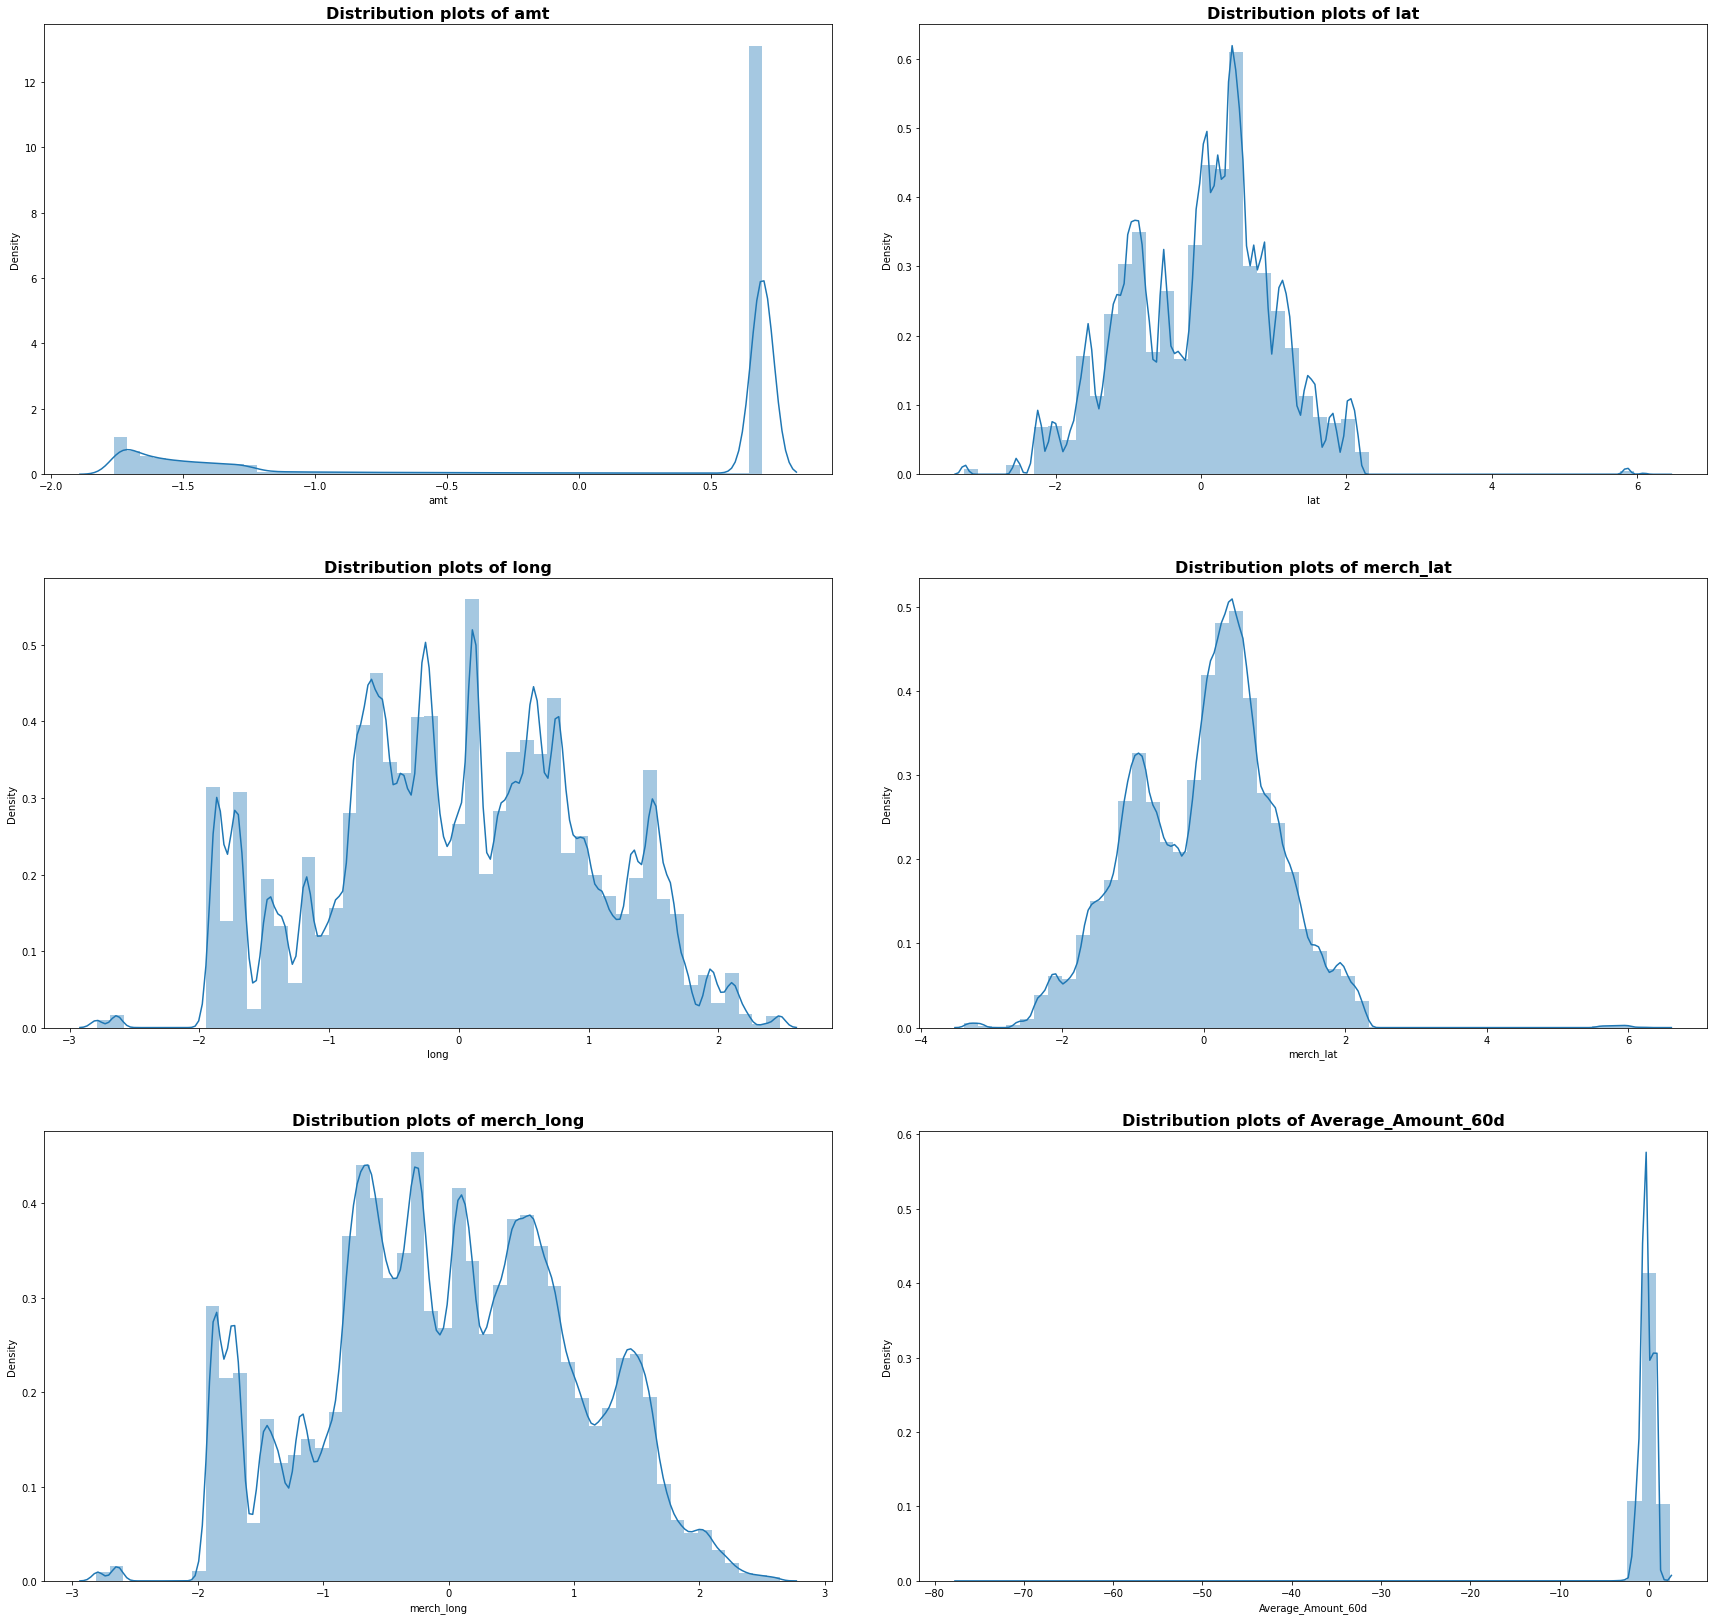

In [82]:
# # Check the skewness 
plt.figure(figsize = (25,30))
for var in enumerate(numvars):
    plt.subplot(4,2,var[0]+1)
    plt.title("Distribution plots of " + var[1], fontweight = 'bold', fontsize = 16)
    sns.distplot(X_train[var[1]])
    
    plt.tight_layout(pad=5.0)
    plt.subplots_adjust(top=1.0)

###### **5.4.2 Decision Tree with Historical Variable**

In [56]:
#Instantiating the Decision Tree object
dth = DecisionTreeClassifier(max_depth=3,random_state=42,class_weight='balanced')

In [57]:
dth.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [62]:
model_evaluator(dth)

Train_set perfomance: 

Accuracy Score: 0.8069890303467759
AUC-ROC: 0.8251350658264364
Precision Score: 0.025806986785997733
Recall Score/Sensitivity: 0.8435026868588178
F1 Score: 0.05008172197704824 

Test Set Performance: 

Confusion Matrix: 
 [[2333479  557766]
 [   2747   14799]] 

Accuracy Score: 0.8073037904751493
AUC-ROC: 0.8252622957954647
Precision Score: 0.025846847082863954
Recall Score/Sensitivity: 0.8434401003077625
F1 Score: 0.05015666544090857


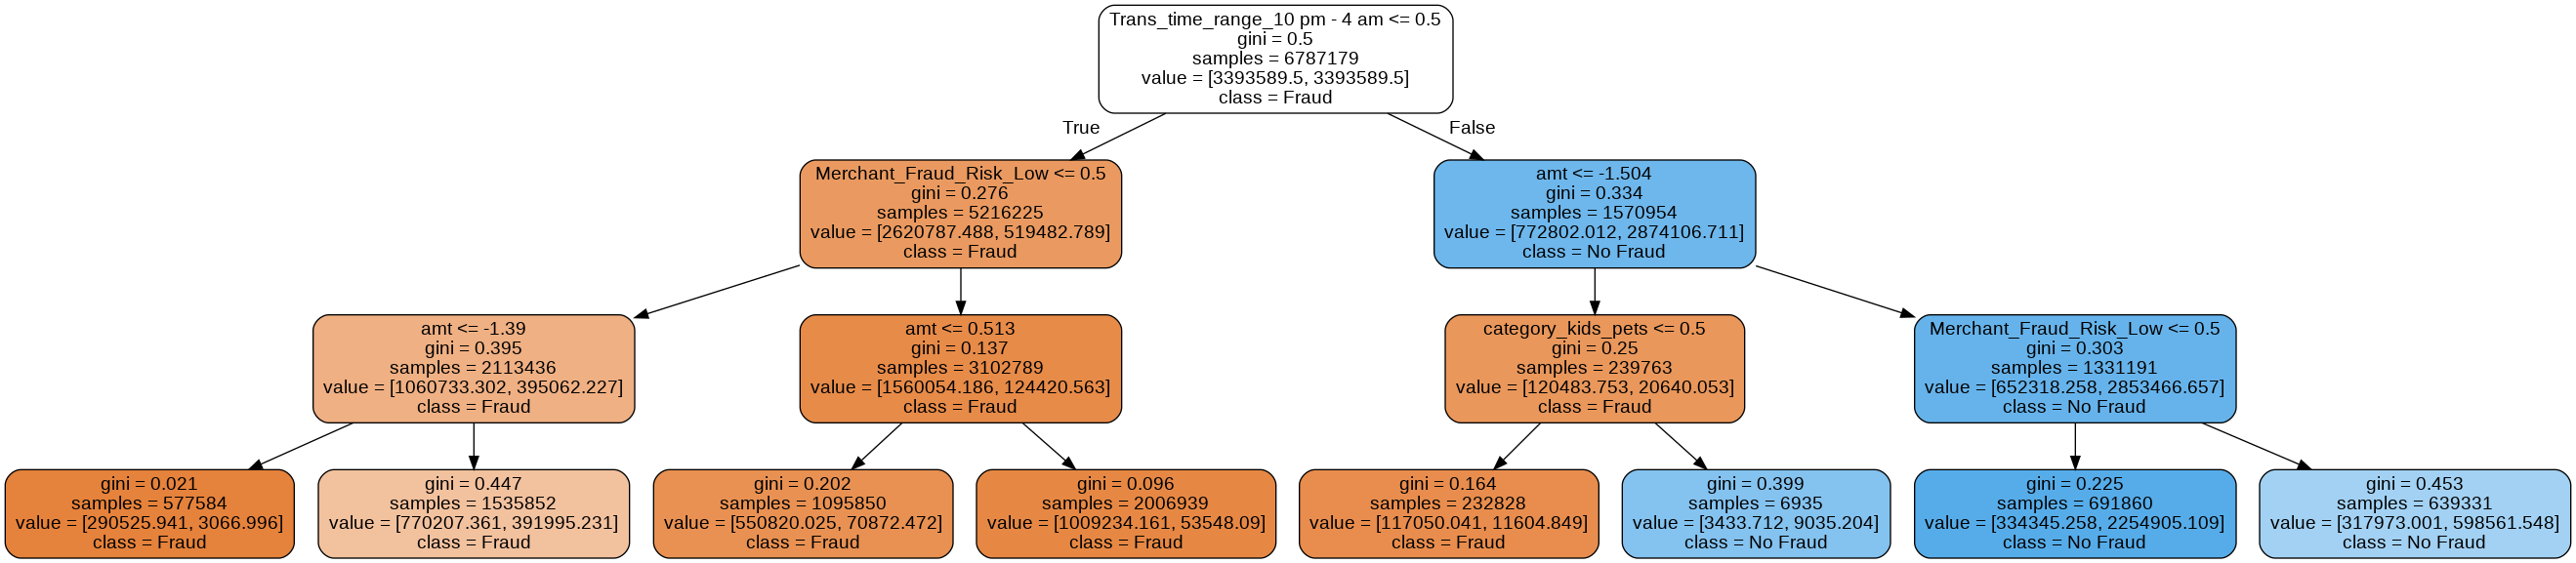

In [64]:
gph=get_dt_graph(dth)
Image(gph.create_png())

**Conclusion**: Addition of a historical variable has not improved the performance of the Decision tree any significantly.

##### **5.4.2.1 Decision Tree with Historical Variable- Hyperparameter Tuning**

In [48]:
# Instantiating Stratified K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
strat_k=StratifiedKFold(n_splits=3,random_state=100)

#Instantiating the Decision Tree Classfier

dth1 = DecisionTreeClassifier()

# Defining parameters for random search

params={
        'max_depth':[5,6,8,12],
        'min_samples_leaf':[10,12,15],
        'min_samples_split':[200,300,500],
        'criterion':['gini'],
        'class_weight':['balanced']
}

In [49]:
#Instantiating random search CV to with the parameters defined above
from sklearn.model_selection import RandomizedSearchCV
rand_search_dth=RandomizedSearchCV(estimator=dth1,param_distributions=params,cv=strat_k,random_state=100,verbose=True)

#Fitting RandomizedSearchCV on X_train and Y_Train

rand_search_dth.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 38.0min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=100, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
   

In [54]:
model_evaluator(rand_search_dth)


Train_set perfomance: 

Accuracy Score: 0.8944344918558947
AUC-ROC: 0.9175087035954661
Precision Score: 0.051181918441648176
Recall Score/Sensitivity: 0.9408646800195408
F1 Score: 0.09708265598024018 

Test Set Performance: 

Confusion Matrix: 
 [[2584948  306297]
 [   1172   16374]] 

Accuracy Score: 0.8942966338936005
AUC-ROC: 0.9136323331379274
Precision Score: 0.05074518627332484
Recall Score/Sensitivity: 0.9332041490938106
F1 Score: 0.096256212946443


#### **6.Conclusion:** 

1. Of the 8 models developed, I have selected the Decision Tree Model((5.2.12) as the best on the basis of its recall value,cost savings and accuracy score when compared to all others. On analysing the cost benefit of this model, a savings of a total of USD 180,969.70 can be obtained, the higher between its close competitor, the Random Forest model, 5.3.13 which gives a savings of USD 113,351.40 to the Business. This calculation is based on the dataset provided- credit_final.

2. The historical variables improved the performance of the Hyperparameter tuned Decision Tree. However, the dataset had increased number of rows which would not have given the right calculations of cost-benefit,which as per instruction should be based on the original dataset,credit_final.

**The chosen model is the Decision Tree developed at section 5.2.12.**

#### **7. Business Impact**

*The cost to the company is reduced by $180,969.70 after the model deployment.*

**** THANK YOU FOR SUPPORT,UPGRAD****

***** This is our last assignment in PGDDS. My sincere thanks to everyone in the content team, student Mentors, Ms.Monica Thapar, Ms.Vidisha and Mr.Blaze, Industry mentors, Mr.Sandeep Muttha,Ms.Rashmi DS,Coach, Mr. Sumit Shukla,Ms.Shubhra Karmahe, for for tremendous support and hardwork throughout an extremely busy 2020.*****

*** THANK YOU FOR GIVING THIS STRUCTURED PLATFORM TO UPSKILL.***